In [70]:
len(apop_ani_koff)

4000

## Port Data to Matlab and Data Overview (after running code)

In [65]:
# ANI-1 APOP

a = az.extract(trace_apop_ani, group = 'posterior', var_names = ["k_on"], keep_dataset = 'true')
apop_ani_kon = a.k_on.values
a = az.extract(trace_apop_ani, group = 'posterior', var_names = ["k_off"], keep_dataset = 'true')
apop_ani_koff = a.k_off.values

# NMY-2 APOP

a = az.extract(trace_apop_nmy, group = 'posterior', var_names = ["k_on"], keep_dataset = 'true')
apop_nmy_kon = a.k_on.values
a = az.extract(trace_apop_nmy, group = 'posterior', var_names = ["k_off"], keep_dataset = 'true')
apop_nmy_koff = a.k_off.values
apop_nmy_koff

# Save APOP Data to Mat File 
from scipy.io import savemat 
import numpy as np
io.savemat("Apop_ani.mat",trace_apop_ani)
io.savemat("Apop_nmy.mat", trace_apop_nmy)

In [66]:
# ANI-1 GSC

a = az.extract(trace_gsc_ani, group = 'posterior', var_names = ["k_on"], keep_dataset = 'true')
gsc_ani_kon = a.k_on.values
a = az.extract(trace_gsc_ani, group = 'posterior', var_names = ["k_off"], keep_dataset = 'true')
gsc_ani_koff = a.k_off.values

# NMY-2 APOP

a = az.extract(trace_gsc_nmy, group = 'posterior', var_names = ["k_on"], keep_dataset = 'true')
gsc_nmy_kon = a.k_on.values
a = az.extract(trace_gsc_nmy, group = 'posterior', var_names = ["k_off"], keep_dataset = 'true')
gsc_nmy_koff = a.k_off.values

# Save GSC Data to Mat File 
from scipy.io import savemat 
import numpy as np
io.savemat("gsc_ani.mat",trace_gsc_ani)
io.savemat("gsc_nmy.mat", trace_gsc_nmy)

In [67]:
# ANI-1 Cell

a = az.extract(trace_cell_ani, group = 'posterior', var_names = ["k_on"], keep_dataset = 'true')
cell_ani_kon = a.k_on.values
a = az.extract(trace_cell_ani, group = 'posterior', var_names = ["k_off"], keep_dataset = 'true')
cell_ani_koff = a.k_off.values

# NMY-2 Cell

a = az.extract(trace_cell_nmy, group = 'posterior', var_names = ["k_on"], keep_dataset = 'true')
cell_nmy_kon = a.k_on.values
a = az.extract(trace_cell_nmy, group = 'posterior', var_names = ["k_off"], keep_dataset = 'true')
cell_nmy_koff = a.k_off.values

# Save Cell Data to Mat File 
from scipy.io import savemat 
import numpy as np
io.savemat("cell_ani.mat",trace_cell_ani)
io.savemat("cell_nmy.mat", trace_cell_nmy)

In [ ]:
conda install -c conda-forge pymc
conda update numpy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import arviz as az
import xarray as xr
import pytensor as pt
import statistics as stat
import pytensor.tensor as at

In [3]:
at

<module 'pytensor.tensor' from 'C:\\Users\\jackl\\anaconda4\\lib\\site-packages\\pytensor\\tensor\\__init__.py'>

In [4]:
DT = 1

# Load Data

In [5]:
import scipy.io as io
data = io.loadmat("data/Apop_timealigned_data.mat")

ani_apop = np.flip(data["ani_apop_mean"].flatten())
ani_apop_SE = np.flip(data["ani_apop_SE"].flatten()) 
nmy_apop = np.flip(data["nmy_apop_mean"].flatten())
nmy_apop_SE = np.flip(data["nmy_apop_SE"].flatten()) 
circumference_apop = np.flip(data["c_mean"].flatten())

In [6]:
data_gsc = io.loadmat("data/GSC_timealigned_data.mat")
ani_gsc = np.flip(data_gsc["ani_gsc_mean"].flatten())
ani_gsc_SE = np.flip(data_gsc["ani_gsc_SE"].flatten() )
nmy_gsc = np.flip(data_gsc["nmy_gsc_mean"].flatten())
nmy_gsc_SE = np.flip(data_gsc["nmy_gsc_SE"].flatten() )
circumference_gsc = np.flip(data_gsc["c_mean"].flatten() ) 

data_cell = io.loadmat("data/Cell_timealigned_data.mat")
ani_cell = np.flip(data_cell["ani_cell_mean"].flatten()) 
ani_cell_SE = np.flip(data_cell["ani_cell_SE"].flatten())
nmy_cell = np.flip(data_cell["nmy_cell_mean"].flatten())
nmy_cell_SE = np.flip(data_cell["nmy_cell_SE"].flatten() )
circumference_cell = np.flip(data_cell["c_mean"].flatten() )

In [7]:
trace_apop_ani = list
trace_apop_nmy = list 
trace_gsc_ani = list 
trace_gsc_nmy = list 
trace_cell_ani = list 
trace_cell_nmy = list 

## NMY Apop

In [8]:
constrained_prior_kon = pm.find_constrained_prior(pm.Gamma,lower= 0.0001, upper = 0.0015, mass = .95, init_guess = dict(alpha=1,beta=1))

constrained_prior_koff = pm.find_constrained_prior(pm.Gamma,lower= 0.01, upper = 1, mass = .95, init_guess = dict(alpha=1,beta=1))

C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(


In [9]:
    with pm.Model() as apop:
    
        # Put in priors (parameter ranges)
        
        kon = pm.Gamma("k_on",**constrained_prior_kon)
        #kon = pm.Uniform("k_on",lower = pow(10,-6), upper = pow(10,-3))
        #kon = pm.Normal("k_on", mu = 0.0001, sigma = .01)
        koff = pm.Gamma("k_off",**constrained_prior_koff)
        #koff = pm.Uniform("k_off", lower = 0.01, upper = 0.1)
        I0 = pm.Normal("I0",mu = nmy_gsc[0], sigma = 10) #lower= nmy_gsc[1]-nmy_gsc_SE[1], upper= nmy_gsc[1]+nmy_gsc_SE[1])
    
        # Model for the expected intensity
        i, _ = pt.scan(lambda c, prior_result, k1, k2: prior_result + DT*(k1*c-k2*prior_result),
                   sequences = [circumference_apop],        
                   non_sequences = [kon, koff],
                   outputs_info = I0)
    
        m = pm.Deterministic("mu_theory", i)
        I1 = pm.Deterministic("I1", i[-1])     #(This is just for book-keeping)

    
        # compare to measured intensity, taking error from data
        
        I = pm.Normal("Inten", mu=m, sigma= nmy_apop_SE, observed=nmy_apop)
    
    
        # run MCMC sampler
        trace = pm.sample(tune=2000, draws=2000) #tune=2000, draws=2000
    
        trace_apop_nmy = trace 
        
        

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [k_on, k_off, I0]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.


array([[<AxesSubplot:title={'center':'I0'}>,
        <AxesSubplot:title={'center':'I0'}>],
       [<AxesSubplot:title={'center':'k_on'}>,
        <AxesSubplot:title={'center':'k_on'}>],
       [<AxesSubplot:title={'center':'k_off'}>,
        <AxesSubplot:title={'center':'k_off'}>],
       [<AxesSubplot:title={'center':'mu_theory'}>,
        <AxesSubplot:title={'center':'mu_theory'}>],
       [<AxesSubplot:title={'center':'I1'}>,
        <AxesSubplot:title={'center':'I1'}>]], dtype=object)

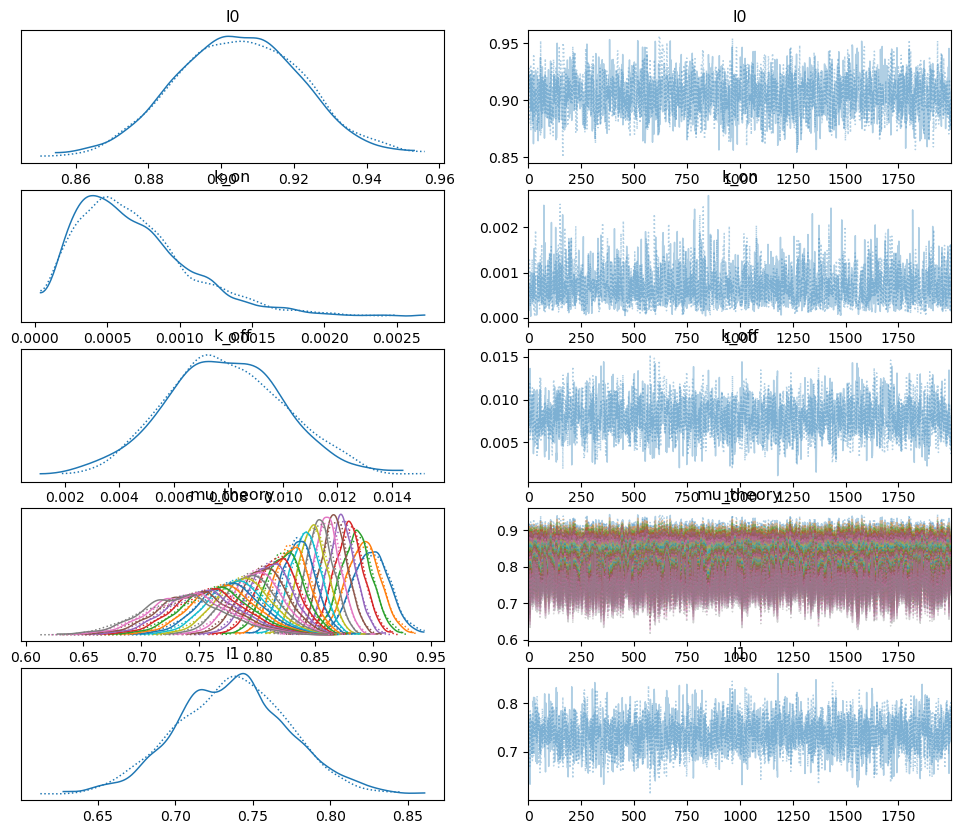

In [11]:
az.plot_trace(trace_apop_nmy)

[0.90501279 0.89854936 0.8921077  0.88571792 0.87936957 0.87302476
 0.86668779 0.86043756 0.85424592 0.84811436 0.84199384 0.83587996
 0.82978402 0.82369391 0.81763925 0.81163624 0.80565972 0.79972347
 0.79382082 0.78793911 0.78207669 0.77623619 0.77039421 0.76458735
 0.75880378 0.75303605 0.74729951 0.74160636]
0.0006858794067786854
0.007894780104496589


AttributeError: 'numpy.ndarray' object has no attribute 'items'

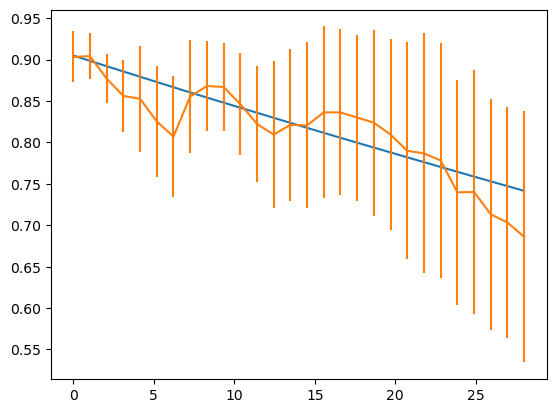

In [71]:
## Itheory NMY-2 

# prior_result + DT*(k1*c-k2*prior_result)


trace_apop_nmy.unstack(inplace = "True")
I_theory_apop_nmy = list

a = az.extract(trace_apop_nmy, group = 'posterior', var_names = ["k_on"], keep_dataset = 'true')
k_on_array = a.k_on.values
a = az.extract(trace_apop_nmy, group = 'posterior', var_names = ["k_off"], keep_dataset = 'true')
k_off_array = a.k_off.values 
a = az.extract(trace_apop_nmy, group = 'posterior', var_names = ["I0"], keep_dataset = 'true')
I0_ani_apop = a.I0.values 

m_I0 = stat.mean(I0_ani_apop)
m_koff = stat.mean(k_off_array)
m_kon = stat.mean(k_on_array)

my_time = len(ani_apop)
dt = 1
count = 1
I_ani_apop = np.zeros(my_time)
I_ani_apop[0] = m_I0
while (count <=my_time-1 ):

    I_ani_apop[count] = I_ani_apop[count-1] + dt*(m_kon*circumference_apop[count-1] - m_koff*I_ani_apop[count-1])
    count = count + 1 
    
t = np.linspace(0,my_time,my_time)
plt.plot(t,I_ani_apop)
plt.errorbar(t,nmy_apop,nmy_apop_SE)

# Get I1 
a = az.extract(trace_apop_nmy, group = 'posterior', var_names = ["I1"], keep_dataset = 'true')
I1_apop_nmy = a.I1.values
print(I_ani_apop)
print(m_kon)
print(m_koff)

array([[<AxesSubplot:ylabel='k_on'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='k_off'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='k_on', ylabel='I0'>,
        <AxesSubplot:xlabel='k_off'>, <AxesSubplot:xlabel='I0'>]],
      dtype=object)

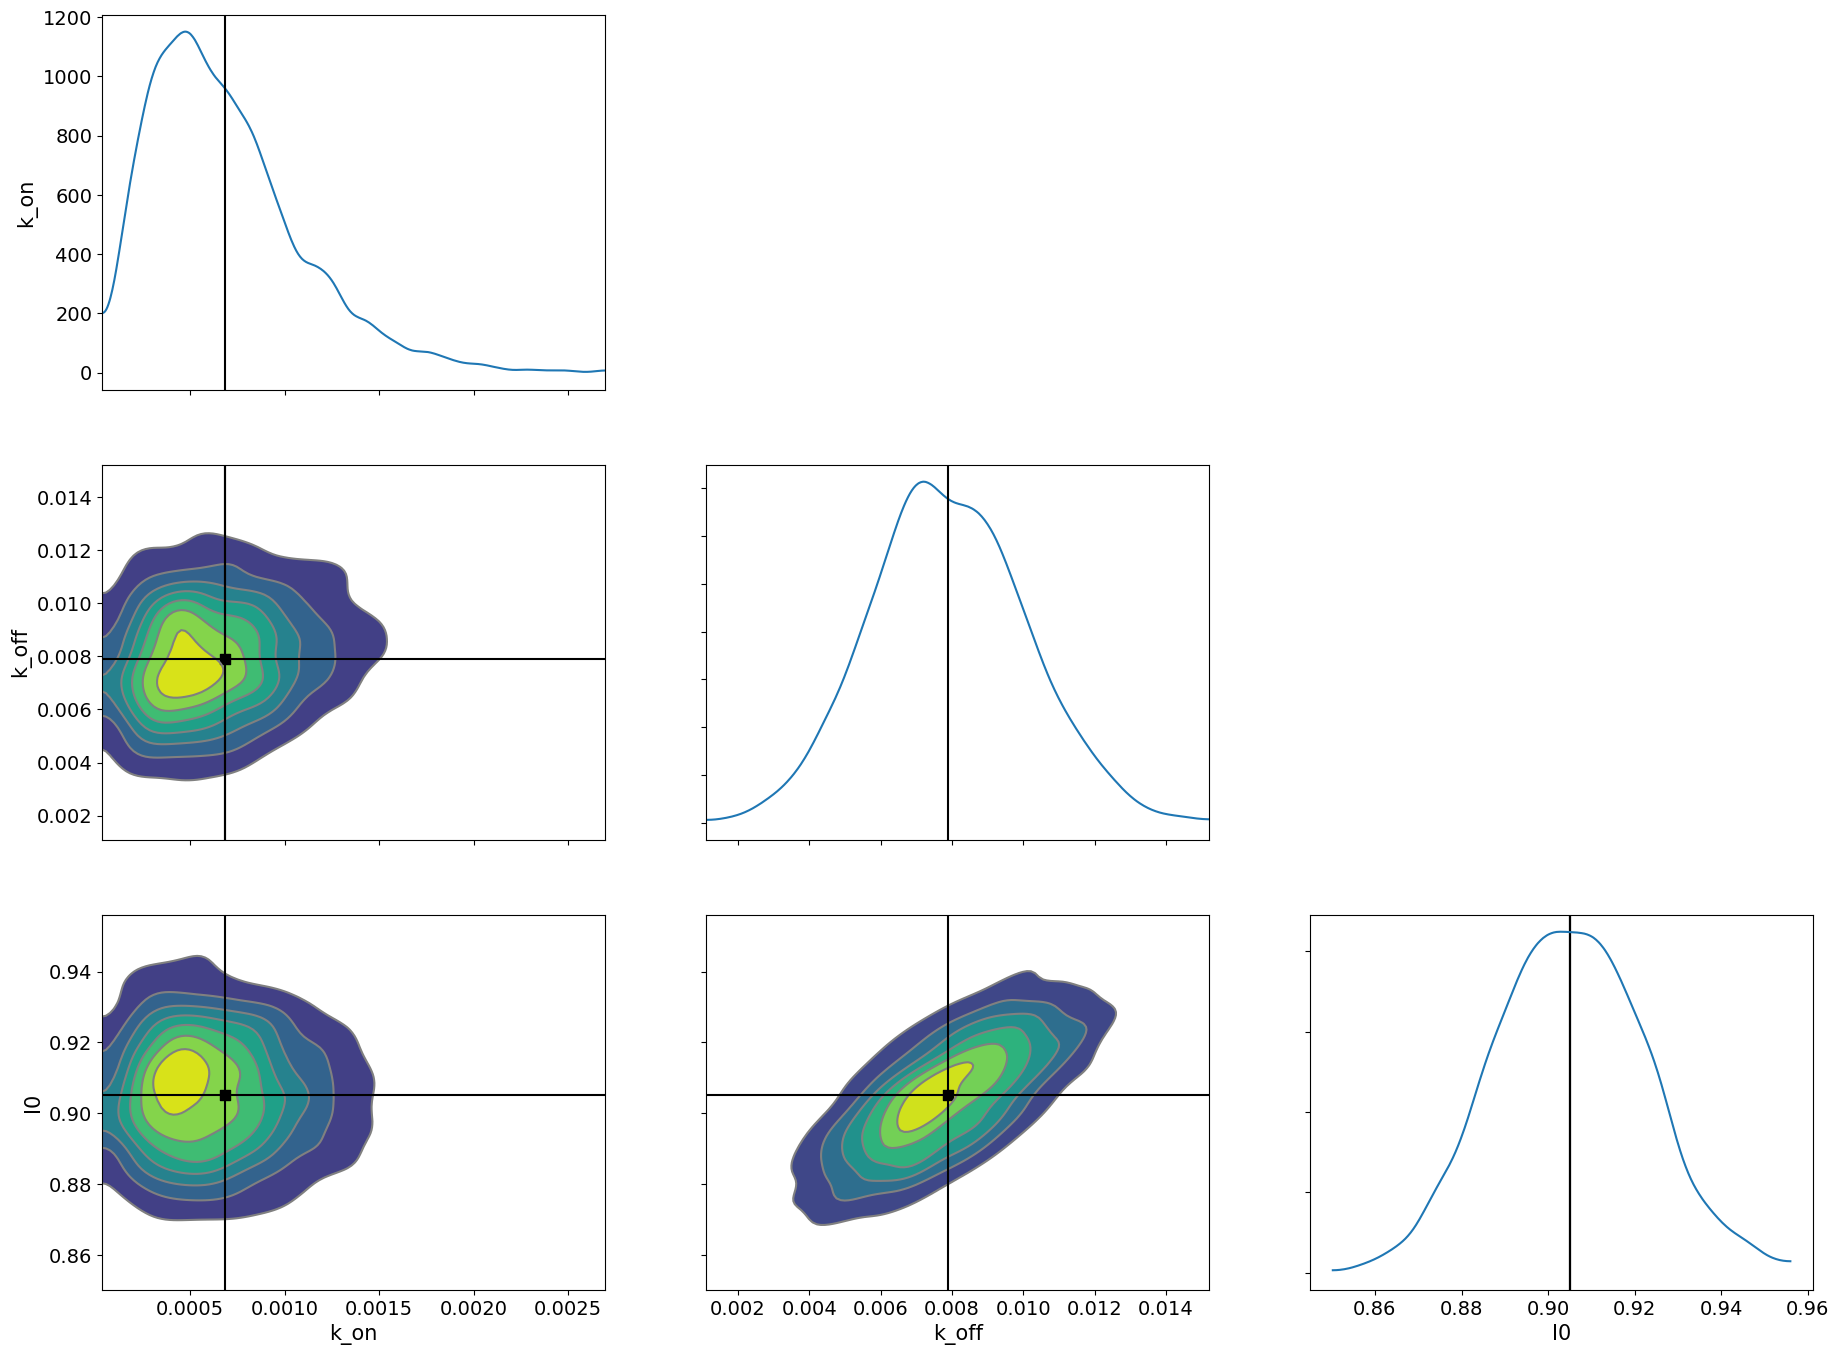

In [13]:
az.plot_pair(trace_apop_nmy ,
             var_names = ['k_on', 'k_off','I0'],
             kind='kde',
             marginals = True,
             point_estimate="mean",
            )

array([[<AxesSubplot:title={'center':'k_on'}>,
        <AxesSubplot:title={'center':'k_on'}>],
       [<AxesSubplot:title={'center':'k_off'}>,
        <AxesSubplot:title={'center':'k_off'}>],
       [<AxesSubplot:title={'center':'I0'}>,
        <AxesSubplot:title={'center':'I0'}>]], dtype=object)

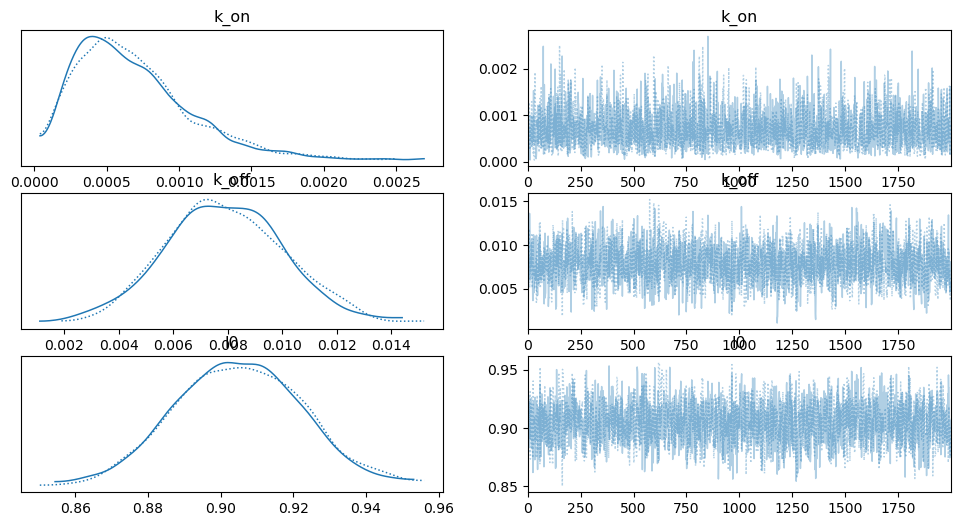

In [14]:
pm.plot_trace(trace_apop_nmy,
              var_names = ['k_on', 'k_off','I0'],)

#pm.plot_trace(trace_apop_ani, var_names = ['k_on', 'k_off'],)

## Ani Apop

In [15]:
constrained_prior_kon = pm.find_constrained_prior(pm.Gamma,lower= 0.01, upper = .2, mass = .95, init_guess = dict(alpha=1,beta=1))

constrained_prior_koff = pm.find_constrained_prior(pm.Gamma,lower= 0.01, upper = .2, mass = .95, init_guess = dict(alpha=1,beta=1))

constrained_prior_koff

C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(


{'alpha': 2.7296483098887943, 'beta': 30.47412579473373}

In [16]:

    with pm.Model() as apop:
    
        # Put in priors (parameter ranges)
        kon = pm.Gamma("k_on",**constrained_prior_kon)
        koff = pm.Gamma("k_off",**constrained_prior_koff)
        I0 = pm.Normal("I0",mu=ani_gsc[1], sigma = ani_gsc_SE[1])
    
        # Model for the expected intensity
        i, _ = pt.scan(lambda c, prior_result, k1, k2: prior_result + DT*(k1*c-k2*prior_result),
                   sequences = [circumference_apop.flatten()],        
                   non_sequences = [kon, koff],
                   outputs_info = I0)
    
        m = pm.Deterministic("mu_theory", i)
        I1 = pm.Deterministic("I1", i[0])     #(This is just for book-keeping)

    
        # compare to measured intensity, taking error from data
     
        I = pm.Normal("Inten", mu=m, sigma= ani_apop_SE , observed=ani_apop.flatten())
    
    
        # run MCMC sampler
        trace = pm.sample(tune=2000, draws=2000)
    
        trace_apop_ani = trace 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [k_on, k_off, I0]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 57 seconds.


array([[<AxesSubplot:>, None],
       [<AxesSubplot:xlabel='k_on', ylabel='k_off'>, <AxesSubplot:>]],
      dtype=object)

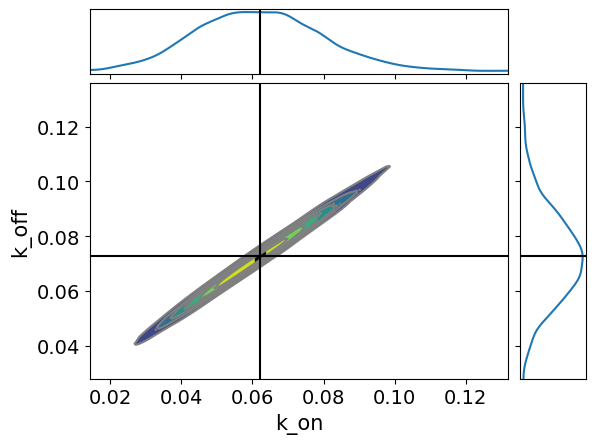

In [17]:
az.plot_pair(trace_apop_ani ,
             var_names = ['k_on', 'k_off'],
             kind='kde',
             marginals = True,
             point_estimate="mean",
            )


array([[<AxesSubplot:title={'center':'k_on'}>,
        <AxesSubplot:title={'center':'k_on'}>],
       [<AxesSubplot:title={'center':'k_off'}>,
        <AxesSubplot:title={'center':'k_off'}>],
       [<AxesSubplot:title={'center':'I0'}>,
        <AxesSubplot:title={'center':'I0'}>]], dtype=object)

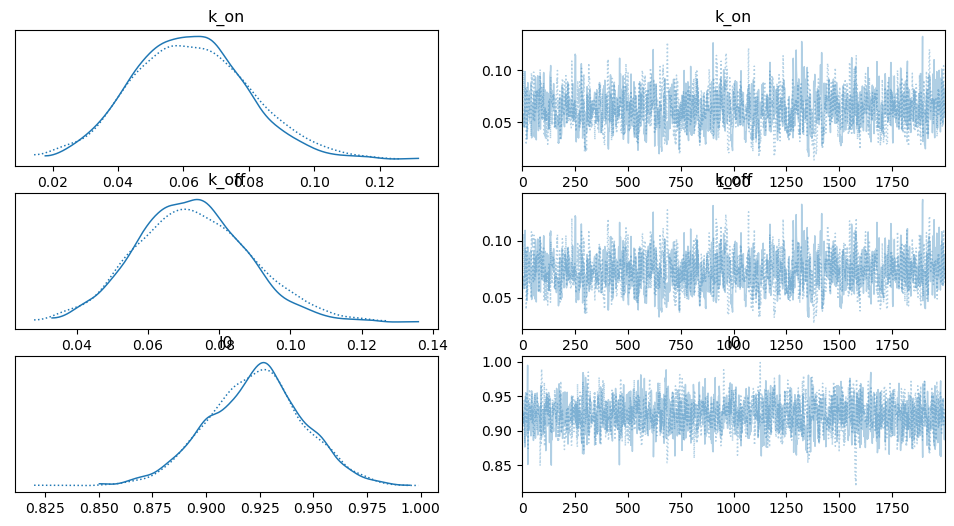

In [18]:
pm.plot_trace(trace_apop_ani,
              var_names = ['k_on', 'k_off','I0'],)

array([[<AxesSubplot:ylabel='k_on'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='k_off'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='k_on', ylabel='I0'>,
        <AxesSubplot:xlabel='k_off'>, <AxesSubplot:xlabel='I0'>]],
      dtype=object)

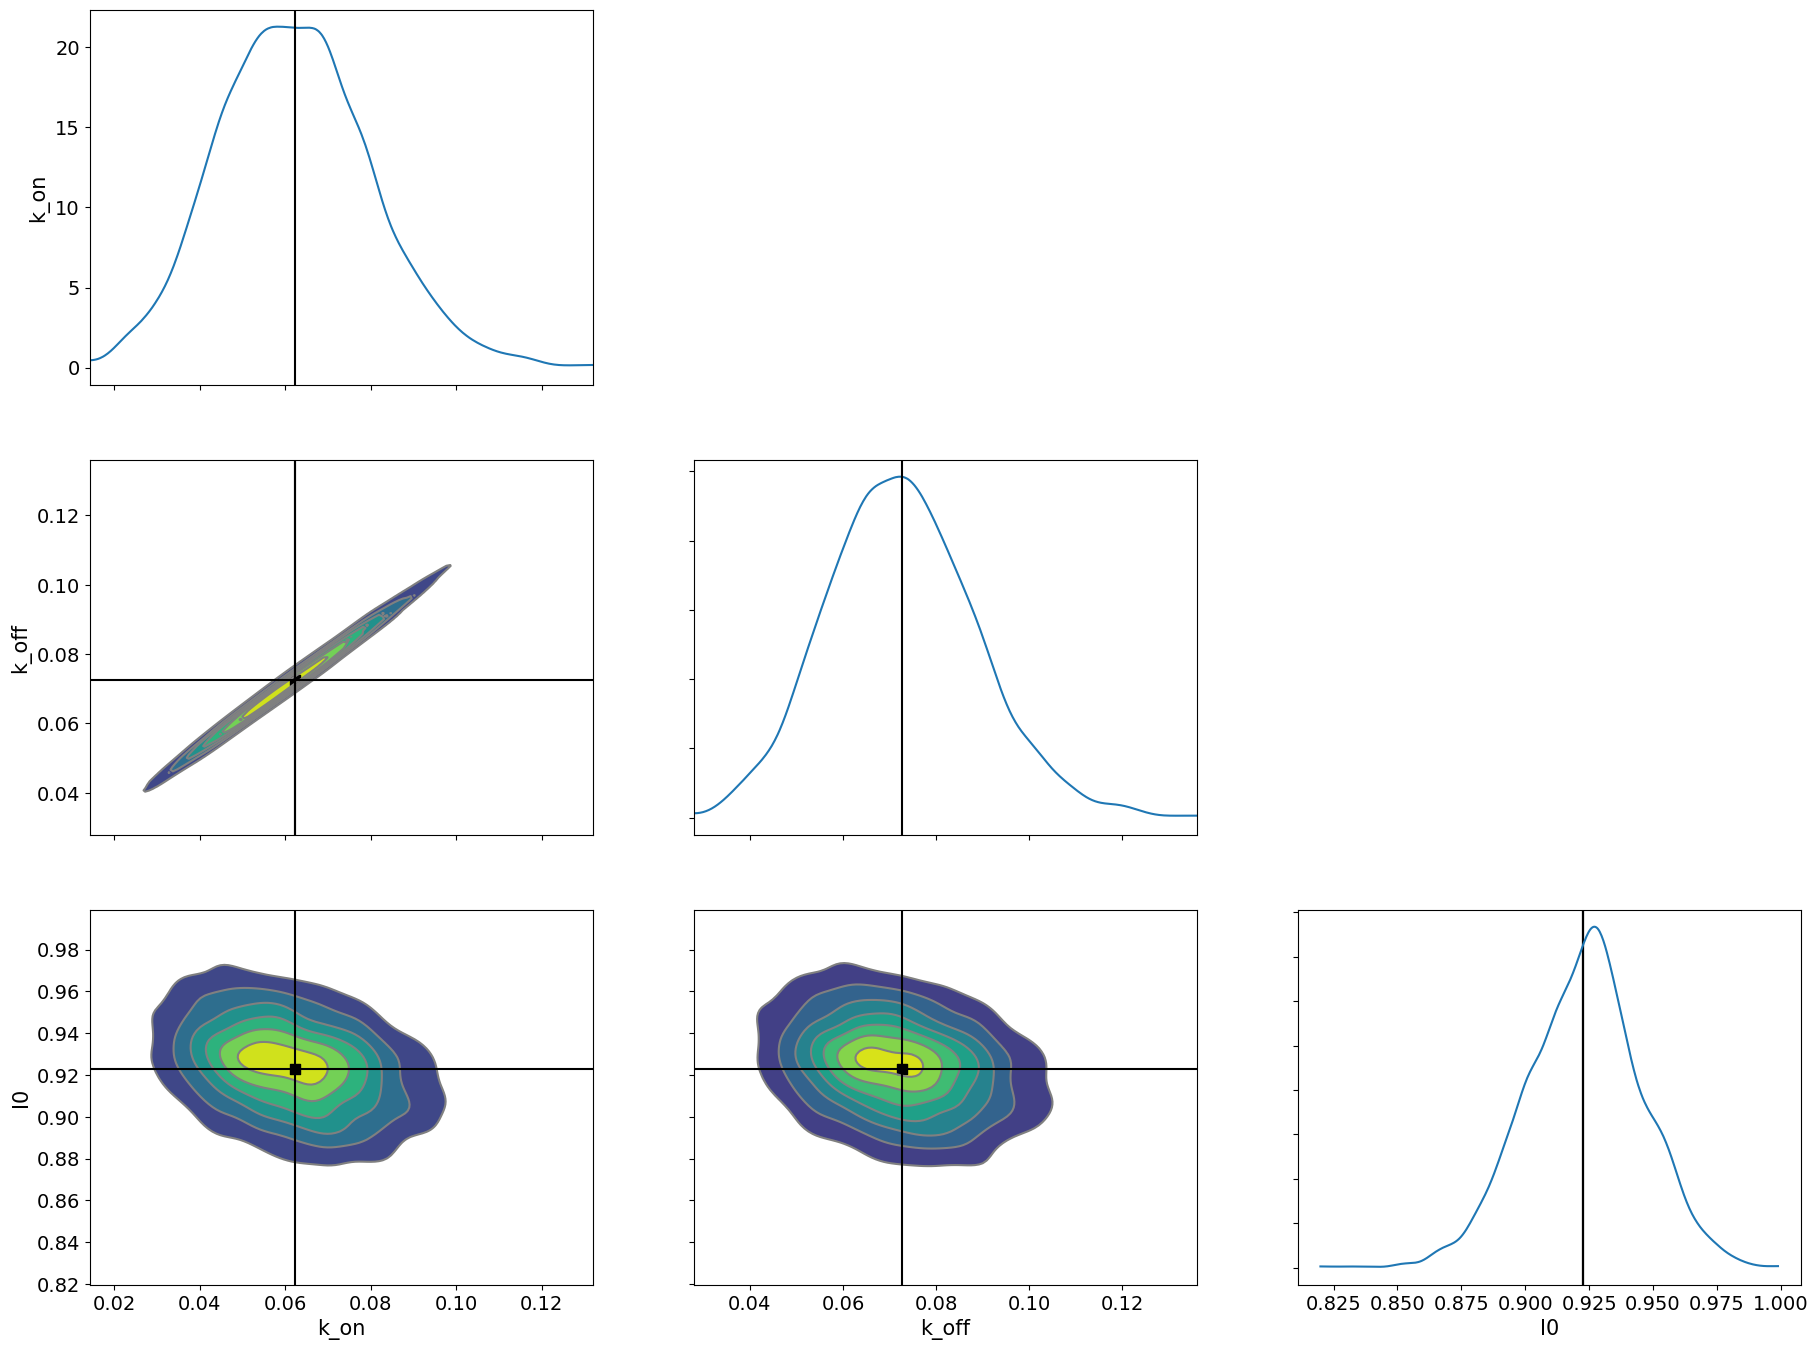

In [19]:
az.plot_pair(trace_apop_ani ,
             var_names = ['k_on', 'k_off','I0'],
             kind='kde',
             marginals = True,
             point_estimate="mean",
            )

[0.92275604 0.91753278 0.91003685 0.90317767 0.89599978 0.88512042
 0.87119999 0.86161938 0.85357134 0.84712425 0.837757   0.82529094
 0.81098121 0.79387677 0.77686871 0.76144453 0.74524574 0.72959548
 0.71387974 0.6969791  0.67884397 0.65981784 0.63785819 0.6164968
 0.59464054 0.5716691  0.54906427 0.52792907]
0.06217694931650223
0.07260656389378563


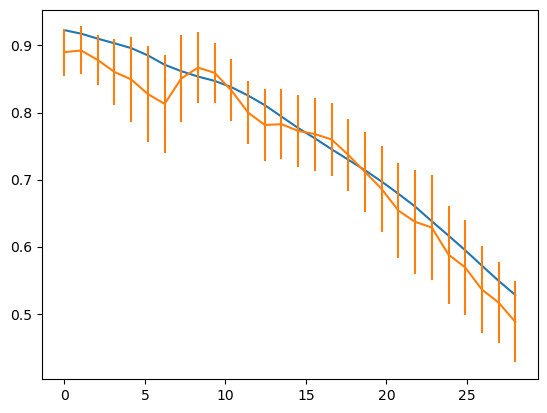

In [20]:
## Itheory NMY-2 

# prior_result + DT*(k1*c-k2*prior_result)


trace_apop_nmy.unstack(inplace = "True")
I_theory_apop_ani = list

a = az.extract(trace_apop_ani, group = 'posterior', var_names = ["k_on"], keep_dataset = 'true')
k_on_array = a.k_on.values
a = az.extract(trace_apop_ani, group = 'posterior', var_names = ["k_off"], keep_dataset = 'true')
k_off_array = a.k_off.values 
a = az.extract(trace_apop_ani, group = 'posterior', var_names = ["I0"], keep_dataset = 'true')
I0_ani_apop = a.I0.values 

m_I0 = stat.mean(I0_ani_apop)
m_koff = stat.mean(k_off_array)
m_kon = stat.mean(k_on_array)

my_time = len(ani_apop)
dt = 1
count = 1
I_ani_apop = np.zeros(my_time)
I_ani_apop[0] = m_I0
while (count <=my_time-1 ):

    I_ani_apop[count] = I_ani_apop[count-1] + dt*(m_kon*circumference_apop[count-1] - m_koff*I_ani_apop[count-1])
    count = count + 1 
    
t = np.linspace(0,my_time,my_time)
plt.plot(t,I_ani_apop)
plt.errorbar(t,ani_apop,ani_apop_SE)

# Get I1 
a = az.extract(trace_apop_nmy, group = 'posterior', var_names = ["I1"], keep_dataset = 'true')
I1_apop_nmy = a.I1.values
print(I_ani_apop)
print(m_kon)
print(m_koff)

## NMY GSC

In [78]:
constrained_prior_kon = pm.find_constrained_prior(pm.Gamma,lower= 1, upper = 3, mass = .95, init_guess = dict(alpha=1,beta=1))
DT = 1
constrained_prior_koff = pm.find_constrained_prior(pm.Gamma,lower= 0.0001, upper = 0.002, mass = .95, init_guess = dict(alpha=1,beta=1))

C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(


In [79]:

    with pm.Model() as gsc:
    
        # Put in priors (parameter ranges)
        kon = pm.Gamma("k_on", **constrained_prior_kon)
        #kon = pm.Normal("k_on", mu = 0, sigma = .01) 
        koff = pm.Gamma("k_off", **constrained_prior_koff)
        #koff = pm.Uniform("k_off", lower = pow(10,-6), upper = .008)
        I0 = pm.Normal("I0",mu = nmy_gsc[0], sigma = 10)
    
        # Model for the expected intensity
        i, _ = pt.scan(lambda c, prior_result, k1, k2: prior_result + DT*(k1*c-k2*prior_result),
                   sequences = [circumference_gsc],        
                   non_sequences = [kon, koff],
                   outputs_info = I0)
    
        m = pm.Deterministic("mu_theory", i)
        I1 = pm.Deterministic("I1", i[0])     #(This is just for book-keeping)

    
        # compare to measured intensity, taking error from data
      
        I = pm.Normal("Inten", mu=m, sigma= nmy_gsc_SE, observed= nmy_gsc)
    
    
        # run MCMC sampler
        trace = pm.sample(tune=4000, draws=4000)
    
        trace_gsc_nmy = trace 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [k_on, k_off, I0]


Sampling 2 chains for 4_000 tune and 4_000 draw iterations (8_000 + 8_000 draws total) took 52 seconds.


array([[<AxesSubplot:>, None],
       [<AxesSubplot:xlabel='k_on', ylabel='k_off'>, <AxesSubplot:>]],
      dtype=object)

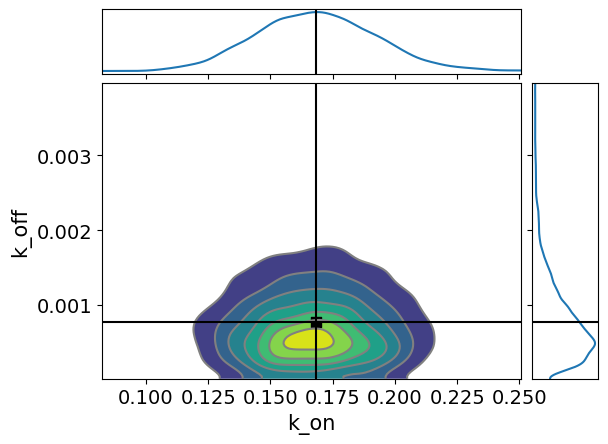

In [74]:
az.plot_pair(trace_gsc_nmy ,
             var_names = ['k_on', 'k_off'],
             kind='kde',
             marginals = True,
             point_estimate="mean",
            )

array([[<AxesSubplot:title={'center':'k_on'}>,
        <AxesSubplot:title={'center':'k_on'}>],
       [<AxesSubplot:title={'center':'k_off'}>,
        <AxesSubplot:title={'center':'k_off'}>],
       [<AxesSubplot:title={'center':'I0'}>,
        <AxesSubplot:title={'center':'I0'}>]], dtype=object)

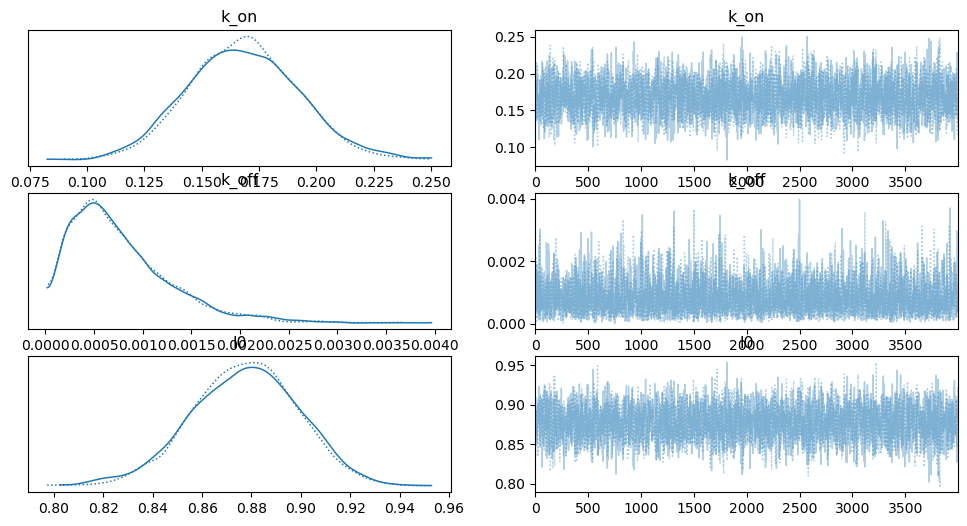

In [75]:
pm.plot_trace(trace_gsc_nmy,
              var_names = ['k_on', 'k_off','I0'],)

array([[<AxesSubplot:ylabel='k_on'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='k_off'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='k_on', ylabel='I0'>,
        <AxesSubplot:xlabel='k_off'>, <AxesSubplot:xlabel='I0'>]],
      dtype=object)

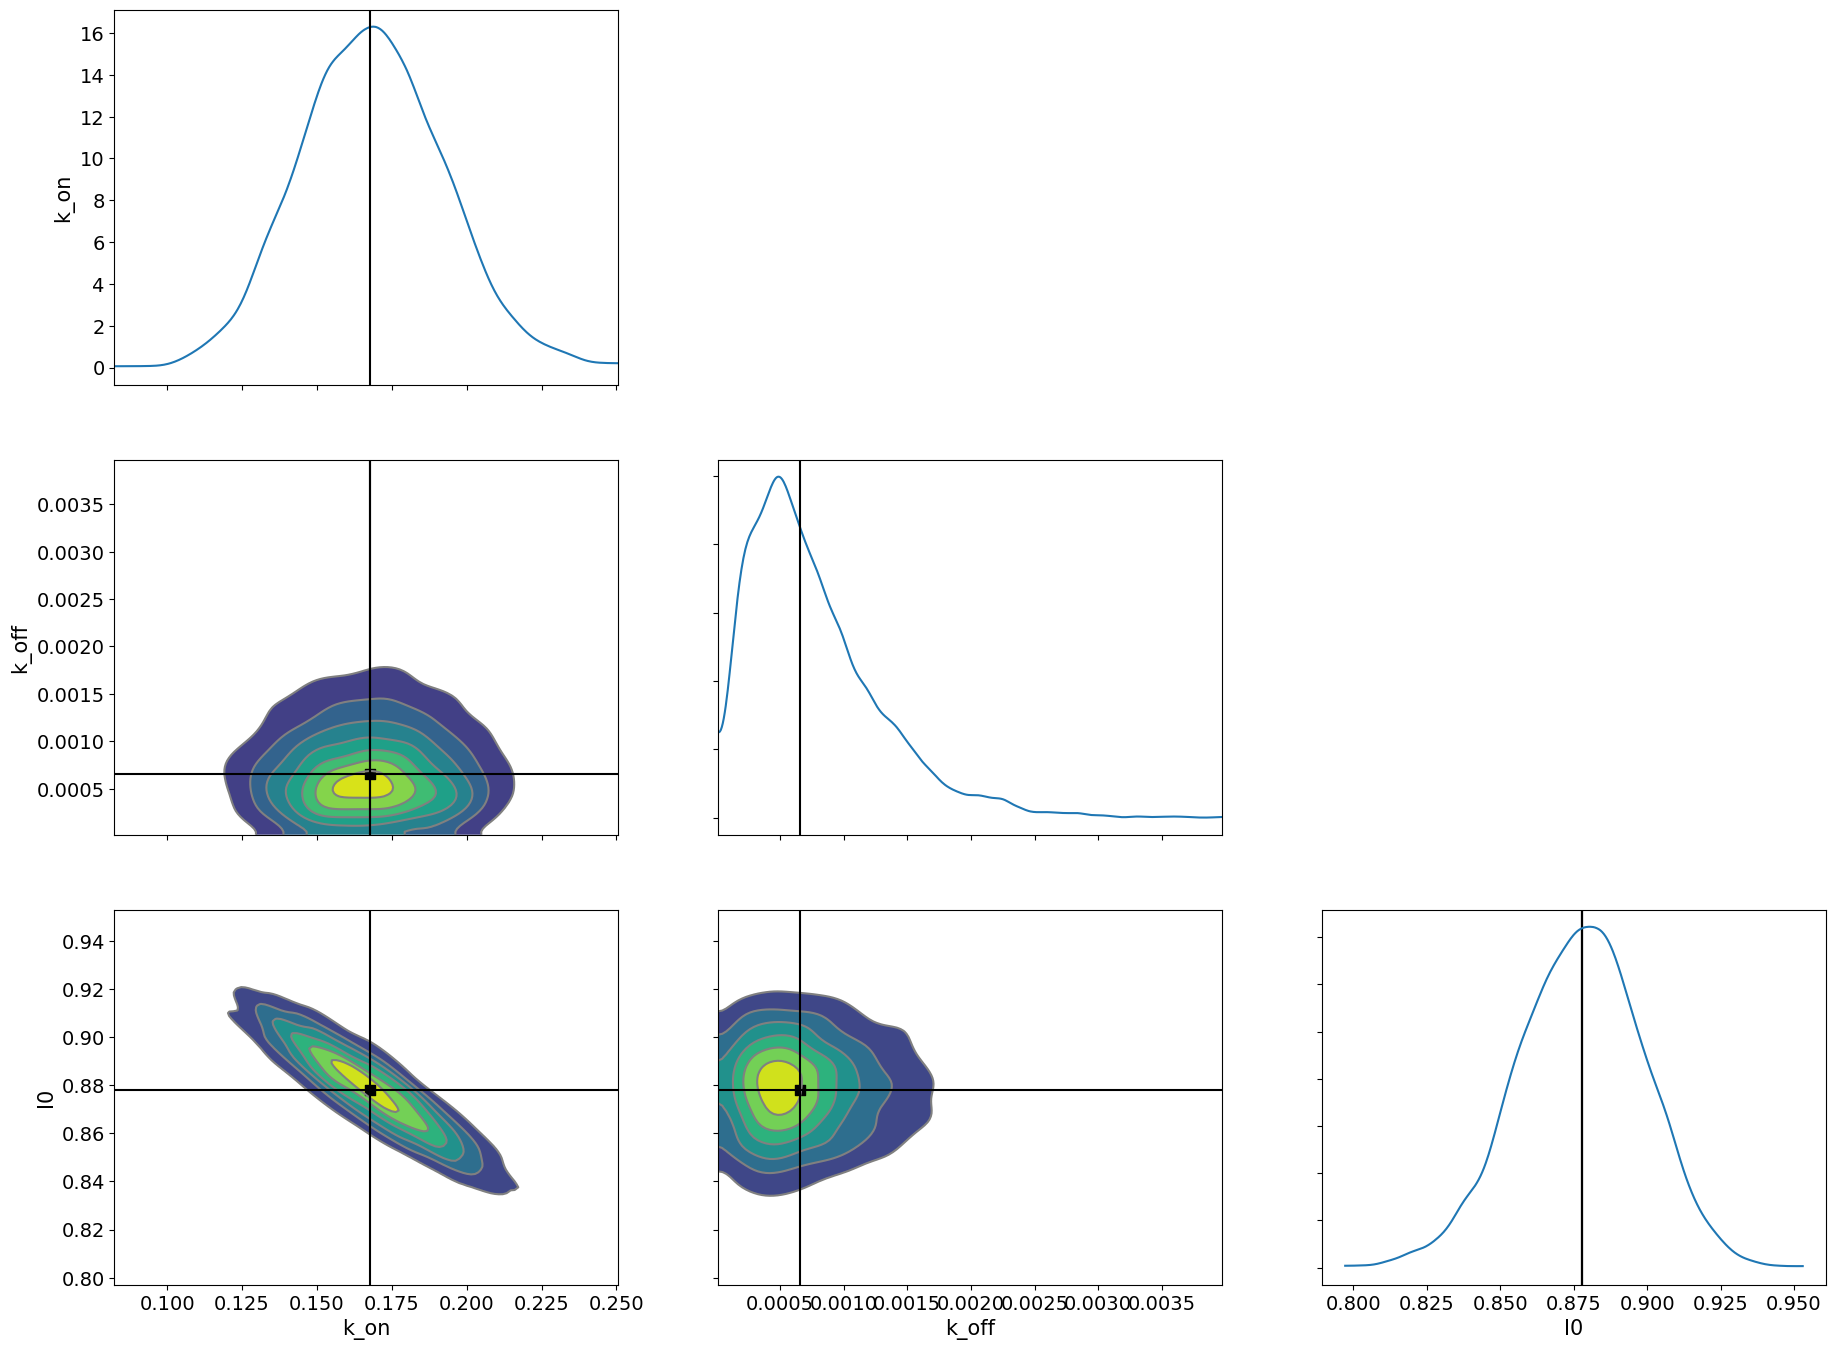

In [76]:
az.plot_pair(trace_gsc_nmy ,
             var_names = ['k_on', 'k_off','I0'],
             kind='kde',
             marginals = True,
             point_estimate="median",
            )

[0.87727806 1.0348852  1.18411369 1.30844781 1.43344351 1.5399857
 1.64723465 1.76411354 1.87793011 1.97943947 2.09304501 2.19256201
 2.30085719 2.40507105 2.49552757 2.58991115 2.68358923 2.76757197
 2.8492706  2.93157749 3.00763822 3.07802937 3.14901301 3.21120772
 3.27229255 3.33071737 3.39221247 3.45203471 3.50977451 3.56143492
 3.60976417 3.65302613]
0.1681658640955903
0.0007704057614571247


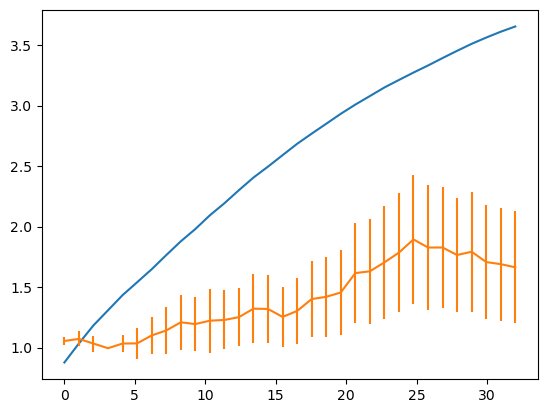

In [77]:
## Itheory NMY-2 

# prior_result + DT*(k1*c-k2*prior_result)


trace_gsc_nmy.unstack(inplace = "True")
I_theory_apop_nmy = list

a = az.extract(trace_gsc_nmy, group = 'posterior', var_names = ["k_on"], keep_dataset = 'true')
k_on_array = a.k_on.values
a = az.extract(trace_gsc_nmy, group = 'posterior', var_names = ["k_off"], keep_dataset = 'true')
k_off_array = a.k_off.values 
a = az.extract(trace_gsc_nmy, group = 'posterior', var_names = ["I0"], keep_dataset = 'true')
I0_ani_apop = a.I0.values 

m_I0 = stat.mean(I0_ani_apop)
m_koff = stat.mean(k_off_array)
m_kon = stat.mean(k_on_array)

my_time = len(nmy_gsc)
dt = 1
count = 1
I_ani_apop = np.zeros(my_time)
I_ani_apop[0] = m_I0
while (count <=my_time-1 ):

    I_ani_apop[count] = I_ani_apop[count-1] + dt*(m_kon*circumference_gsc[count-1] - m_koff*I_ani_apop[count-1])
    count = count + 1 
    
t = np.linspace(0,my_time,my_time)
plt.plot(t,I_ani_apop)
plt.errorbar(t,nmy_gsc,nmy_gsc_SE)

# Get I1 
a = az.extract(trace_gsc_nmy, group = 'posterior', var_names = ["I1"], keep_dataset = 'true')
I1_apop_nmy = a.I1.values
print(I_ani_apop)
print(m_kon)
print(m_koff)

## Ani GSC

In [27]:
constrained_prior_kon = pm.find_constrained_prior(pm.Gamma,lower= 0.001, upper = 0.015, mass = .95, init_guess = dict(alpha=1,beta=1))

constrained_prior_koff = pm.find_constrained_prior(pm.Gamma,lower= 0.001, upper = 0.025, mass = .95, init_guess = dict(alpha=1,beta=1))

C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(


In [28]:

    with pm.Model() as gsc:
    
        # Put in priors (parameter ranges)
        kon = pm.Gamma("k_on", **constrained_prior_kon)
        koff = pm.Gamma("k_off", **constrained_prior_koff)
        I0 = pm.Normal("I0", mu = ani_gsc[0], sigma = ani_gsc_SE[0])
    
        # Model for the expected intensity
        i, _ = pt.scan(lambda c, prior_result, k1, k2: prior_result + DT*(k1*c-k2*prior_result),
                   sequences = [circumference_gsc],        
                   non_sequences = [kon, koff],
                   outputs_info = I0)
    
        m = pm.Deterministic("mu_theory", i)
        I1 = pm.Deterministic("I1", i[0])     #(This is just for book-keeping)

    
        # compare to measured intensity, taking error from data
       
        I = pm.Normal("Inten", mu=m, sigma= ani_gsc_SE, observed=ani_gsc) 
    
    
        # run MCMC sampler
        trace = pm.sample(tune=2000, draws=2000)
    
        trace_gsc_ani= trace 
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [k_on, k_off, I0]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.


array([[<AxesSubplot:>, None],
       [<AxesSubplot:xlabel='k_on', ylabel='k_off'>, <AxesSubplot:>]],
      dtype=object)

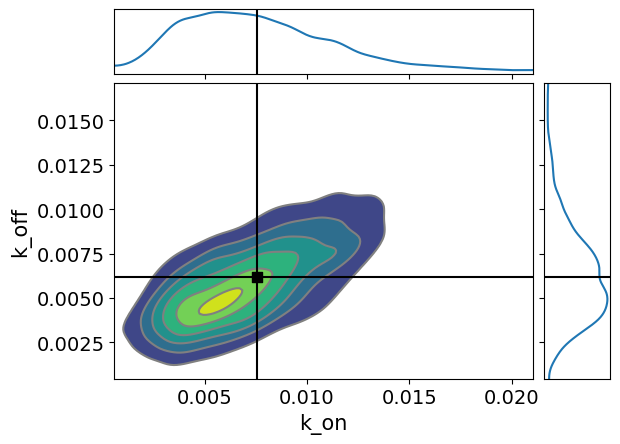

In [29]:
az.plot_pair(trace_gsc_ani ,
             var_names = ['k_on', 'k_off'],
             kind='kde',
             marginals = True,
             point_estimate="mean",
            )

array([[<AxesSubplot:title={'center':'k_on'}>,
        <AxesSubplot:title={'center':'k_on'}>],
       [<AxesSubplot:title={'center':'k_off'}>,
        <AxesSubplot:title={'center':'k_off'}>],
       [<AxesSubplot:title={'center':'I0'}>,
        <AxesSubplot:title={'center':'I0'}>]], dtype=object)

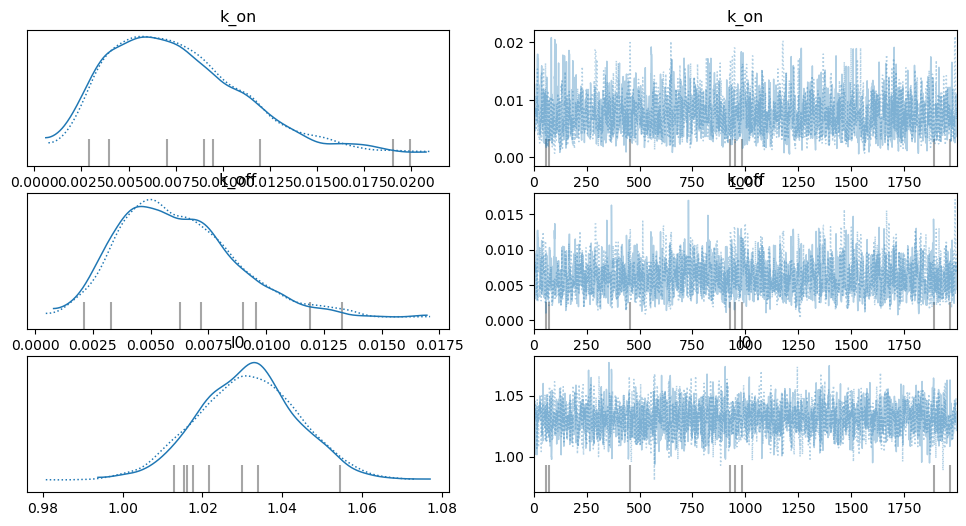

In [30]:
pm.plot_trace(trace_gsc_ani,
              var_names = ['k_on', 'k_off','I0'],)

array([[<AxesSubplot:ylabel='k_on'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='k_off'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='k_on', ylabel='I0'>,
        <AxesSubplot:xlabel='k_off'>, <AxesSubplot:xlabel='I0'>]],
      dtype=object)

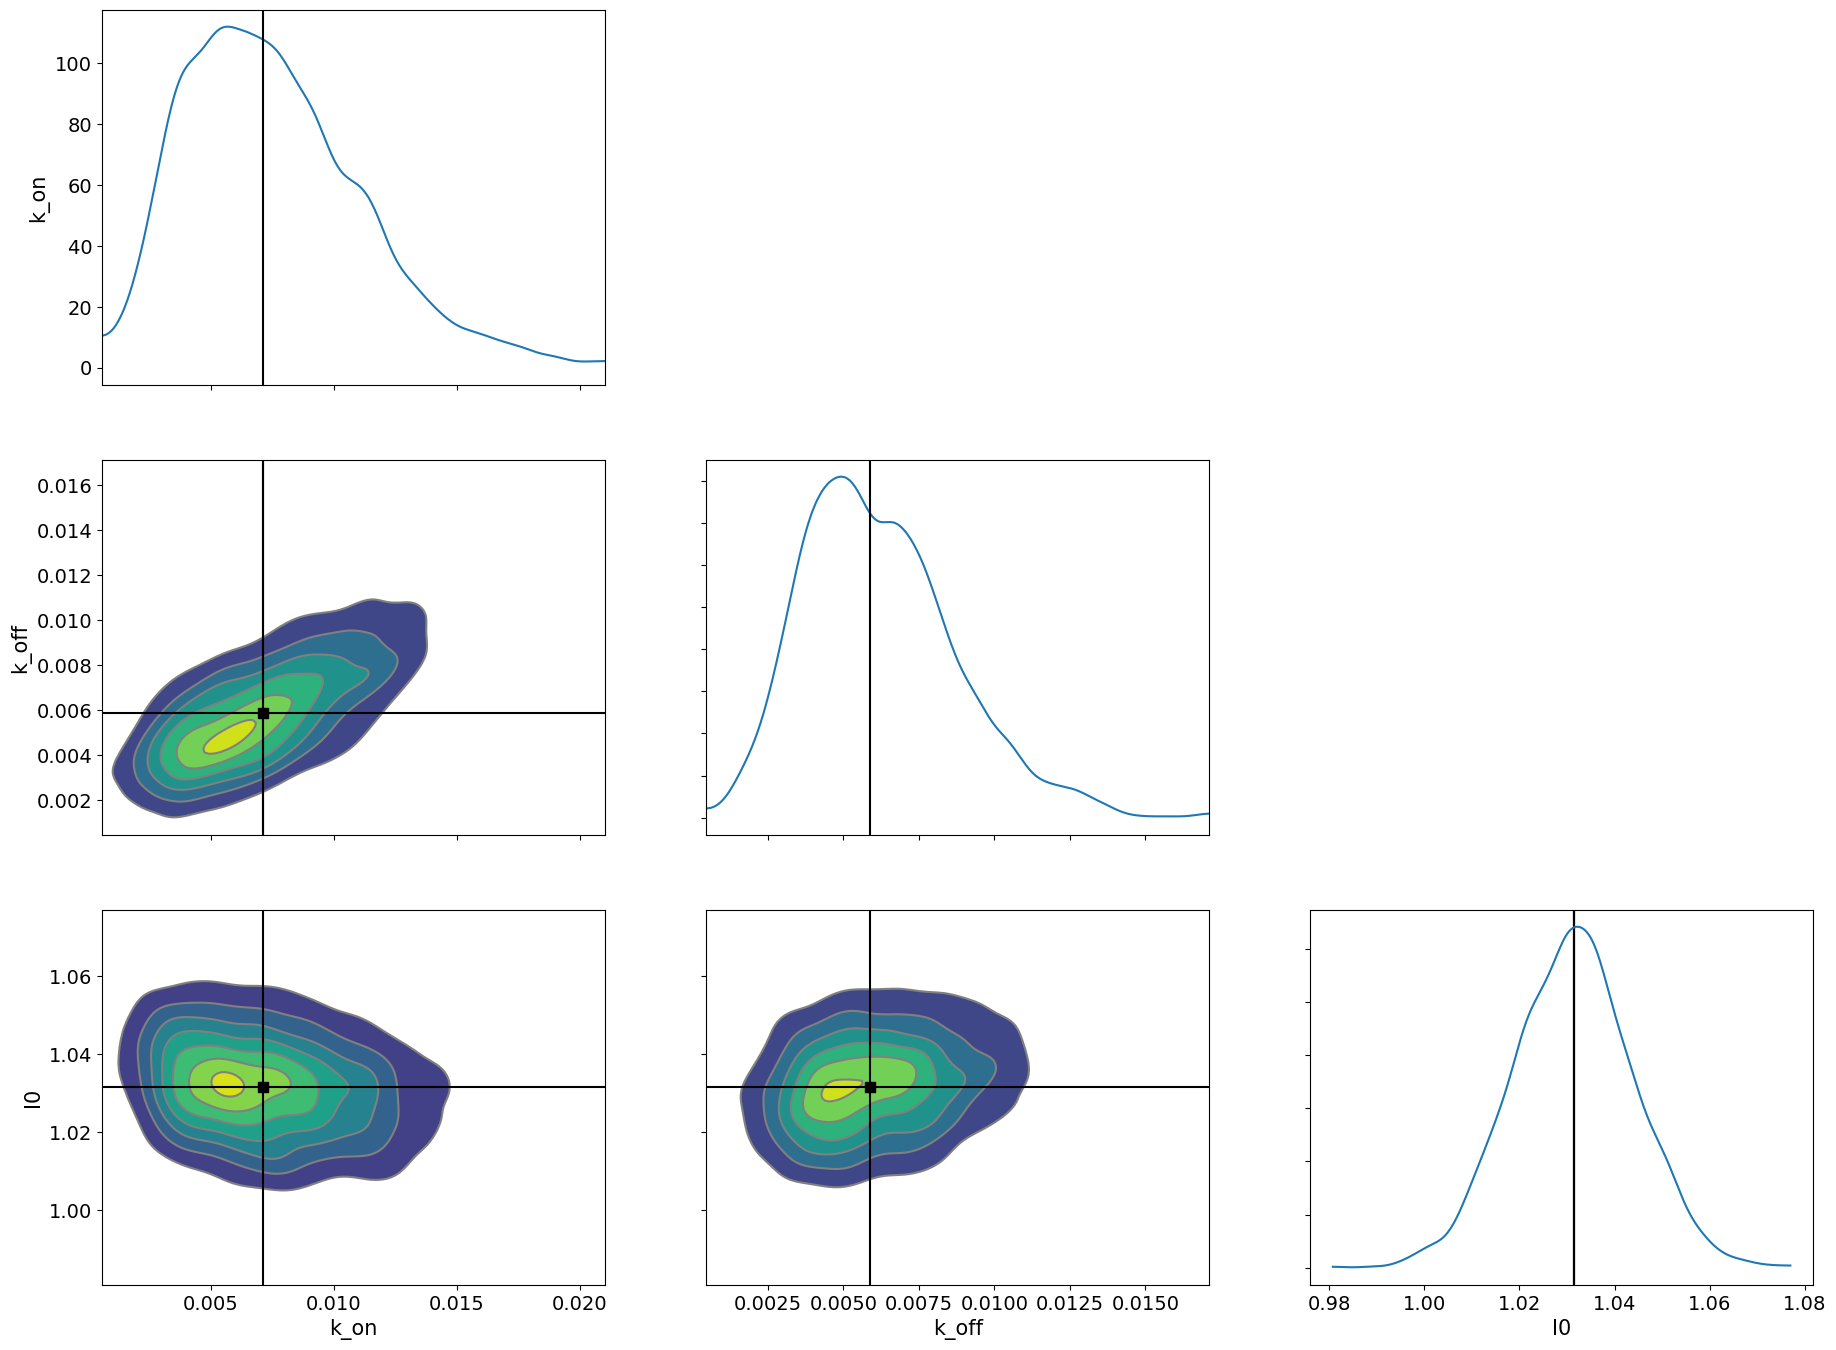

In [31]:
az.plot_pair(trace_gsc_ani ,
             var_names = ['k_on', 'k_off','I0'],
             kind='kde',
             marginals = True,
             point_estimate="median",
            )

[1.03135186 1.03211135 1.03249433 1.03175909 1.03106251 1.02954358
 1.02806955 1.02704199 1.02588692 1.02418874 1.02304926 1.02128634
 1.01993305 1.01840808 1.01627664 1.01433834 1.01238351 1.01000741
 1.00754604 1.00513009 1.00245064 0.99953507 0.99666663 0.99342258
 0.99015075 0.98678145 0.98357324 0.98031164 0.97697848 0.97339415
 0.96968373 0.96576972]
0.007572677452505202
0.006174563872249495


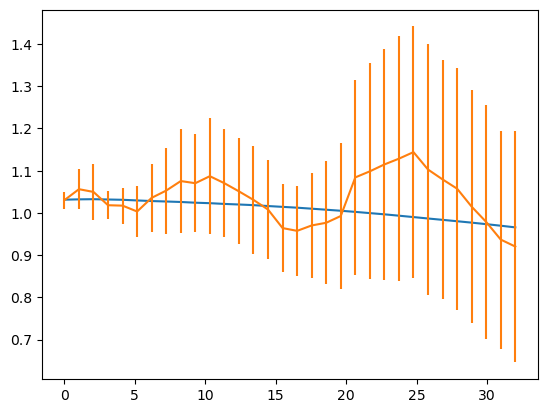

In [32]:
## Itheory NMY-2 

# prior_result + DT*(k1*c-k2*prior_result)


trace_gsc_ani.unstack(inplace = "True")
I_theory_apop_nmy = list

a = az.extract(trace_gsc_ani, group = 'posterior', var_names = ["k_on"], keep_dataset = 'true')
k_on_array = a.k_on.values
a = az.extract(trace_gsc_ani, group = 'posterior', var_names = ["k_off"], keep_dataset = 'true')
k_off_array = a.k_off.values 
a = az.extract(trace_gsc_ani, group = 'posterior', var_names = ["I0"], keep_dataset = 'true')
I0_ani_apop = a.I0.values 

m_I0 = stat.mean(I0_ani_apop)
m_koff = stat.mean(k_off_array)
m_kon = stat.mean(k_on_array)

my_time = len(ani_gsc)
dt = 1
count = 1
I_ani_apop = np.zeros(my_time)
I_ani_apop[0] = m_I0
while (count <=my_time-1 ):

    I_ani_apop[count] = I_ani_apop[count-1] + dt*(m_kon*circumference_gsc[count-1] - m_koff*I_ani_apop[count-1])
    count = count + 1 
    
t = np.linspace(0,my_time,my_time)
plt.plot(t,I_ani_apop)
plt.errorbar(t,ani_gsc,ani_gsc_SE)

# Get I1 
a = az.extract(trace_gsc_ani, group = 'posterior', var_names = ["I1"], keep_dataset = 'true')
I1_apop_nmy = a.I1.values
print(I_ani_apop)
print(m_kon)
print(m_koff)

## NMY Cellularization 

In [33]:
constrained_prior_kon = pm.find_constrained_prior(pm.Gamma,lower= 0.01, upper = 1, mass = .95, init_guess = dict(alpha=1,beta=1))

constrained_prior_koff = pm.find_constrained_prior(pm.Gamma,lower= 0.01, upper = 1, mass = .95, init_guess = dict(alpha=1,beta=1))

nmy_cell

C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(


array([1.15445117, 1.18417977, 1.1072559 , 1.04142334, 1.01464974,
       0.95469682, 0.96955164, 1.00222614, 0.9850531 , 0.98779242,
       1.02353166, 1.03505216, 1.02443312, 1.08201574, 1.09402168,
       1.08353085, 1.05895842, 1.04081484, 1.00879792, 1.01567997,
       1.01917653, 1.03633844, 1.05267082, 1.04558459, 0.99949242,
       0.96656033, 0.93427046, 0.90099742, 0.89756965, 0.92753645,
       0.94302854, 0.92810887, 0.91193155, 0.87120849, 0.81537056,
       0.74293744, 0.70755008, 0.69094617, 0.67986603, 0.67282292,
       0.68192155, 0.66874416, 0.63979515, 0.6269778 , 0.61930616])

In [34]:
    with pm.Model() as cell:
    
        # Put in priors (parameter ranges)
        kon = pm.Gamma("k_on", **constrained_prior_kon)
        koff = pm.Gamma("k_off",**constrained_prior_koff)
        I0 = pm.Normal("I0",mu = nmy_cell[0] , sigma = nmy_cell_SE[0]) # make sigma bigger 
        #I0 = pm.Uniform("I0", lower = .8, upper = .95)
        # Model for the expected intensity
        i, _ = pt.scan(lambda c, prior_result, k1, k2: prior_result + DT*(k1*c-k2*prior_result),
                   sequences = [circumference_cell],        
                   non_sequences = [kon, koff],
                   outputs_info = I0)
    
        m = pm.Deterministic("mu_theory", i)
        I1 = pm.Deterministic("I1", i[0])     #(This is just for book-keeping)

    
        # compare to measured intensity, taking error from data
   
        I = pm.Normal("Inten", mu=m, sigma= nmy_cell_SE, observed= nmy_cell) 
    
    
        # run MCMC sampler
        trace = pm.sample(tune=2000, draws=2000)
    
        trace_cell_nmy = trace 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [k_on, k_off, I0]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 94 seconds.


array([[<AxesSubplot:>, None],
       [<AxesSubplot:xlabel='k_on', ylabel='k_off'>, <AxesSubplot:>]],
      dtype=object)

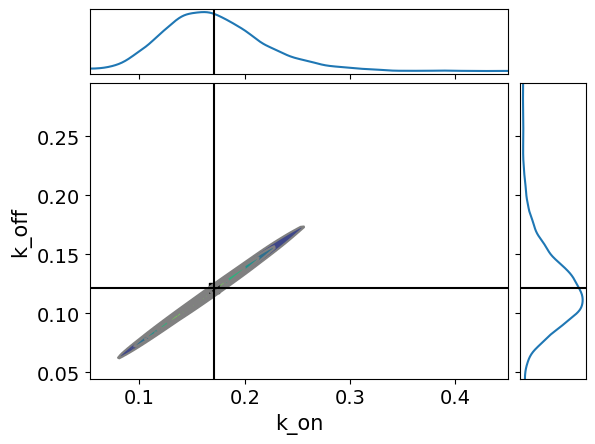

In [36]:
az.plot_pair(trace_cell_nmy ,
             var_names = ['k_on', 'k_off'],
             kind='kde',
             marginals = True,
             point_estimate="mean",
            )

array([[<AxesSubplot:title={'center':'k_on'}>,
        <AxesSubplot:title={'center':'k_on'}>],
       [<AxesSubplot:title={'center':'k_off'}>,
        <AxesSubplot:title={'center':'k_off'}>],
       [<AxesSubplot:title={'center':'I0'}>,
        <AxesSubplot:title={'center':'I0'}>]], dtype=object)

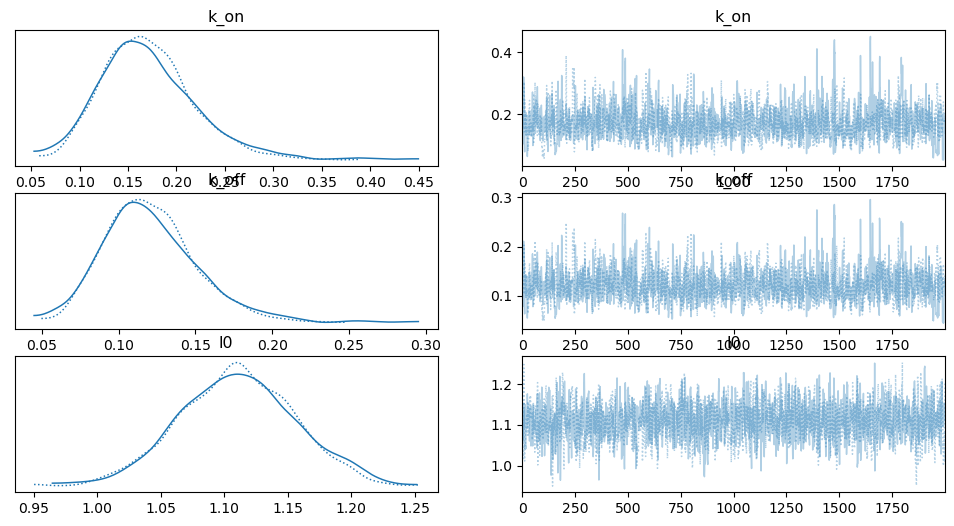

In [37]:
pm.plot_trace(trace_cell_nmy,
              var_names = ['k_on', 'k_off','I0'],)

array([[<AxesSubplot:ylabel='k_on'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='k_off'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='k_on', ylabel='I0'>,
        <AxesSubplot:xlabel='k_off'>, <AxesSubplot:xlabel='I0'>]],
      dtype=object)

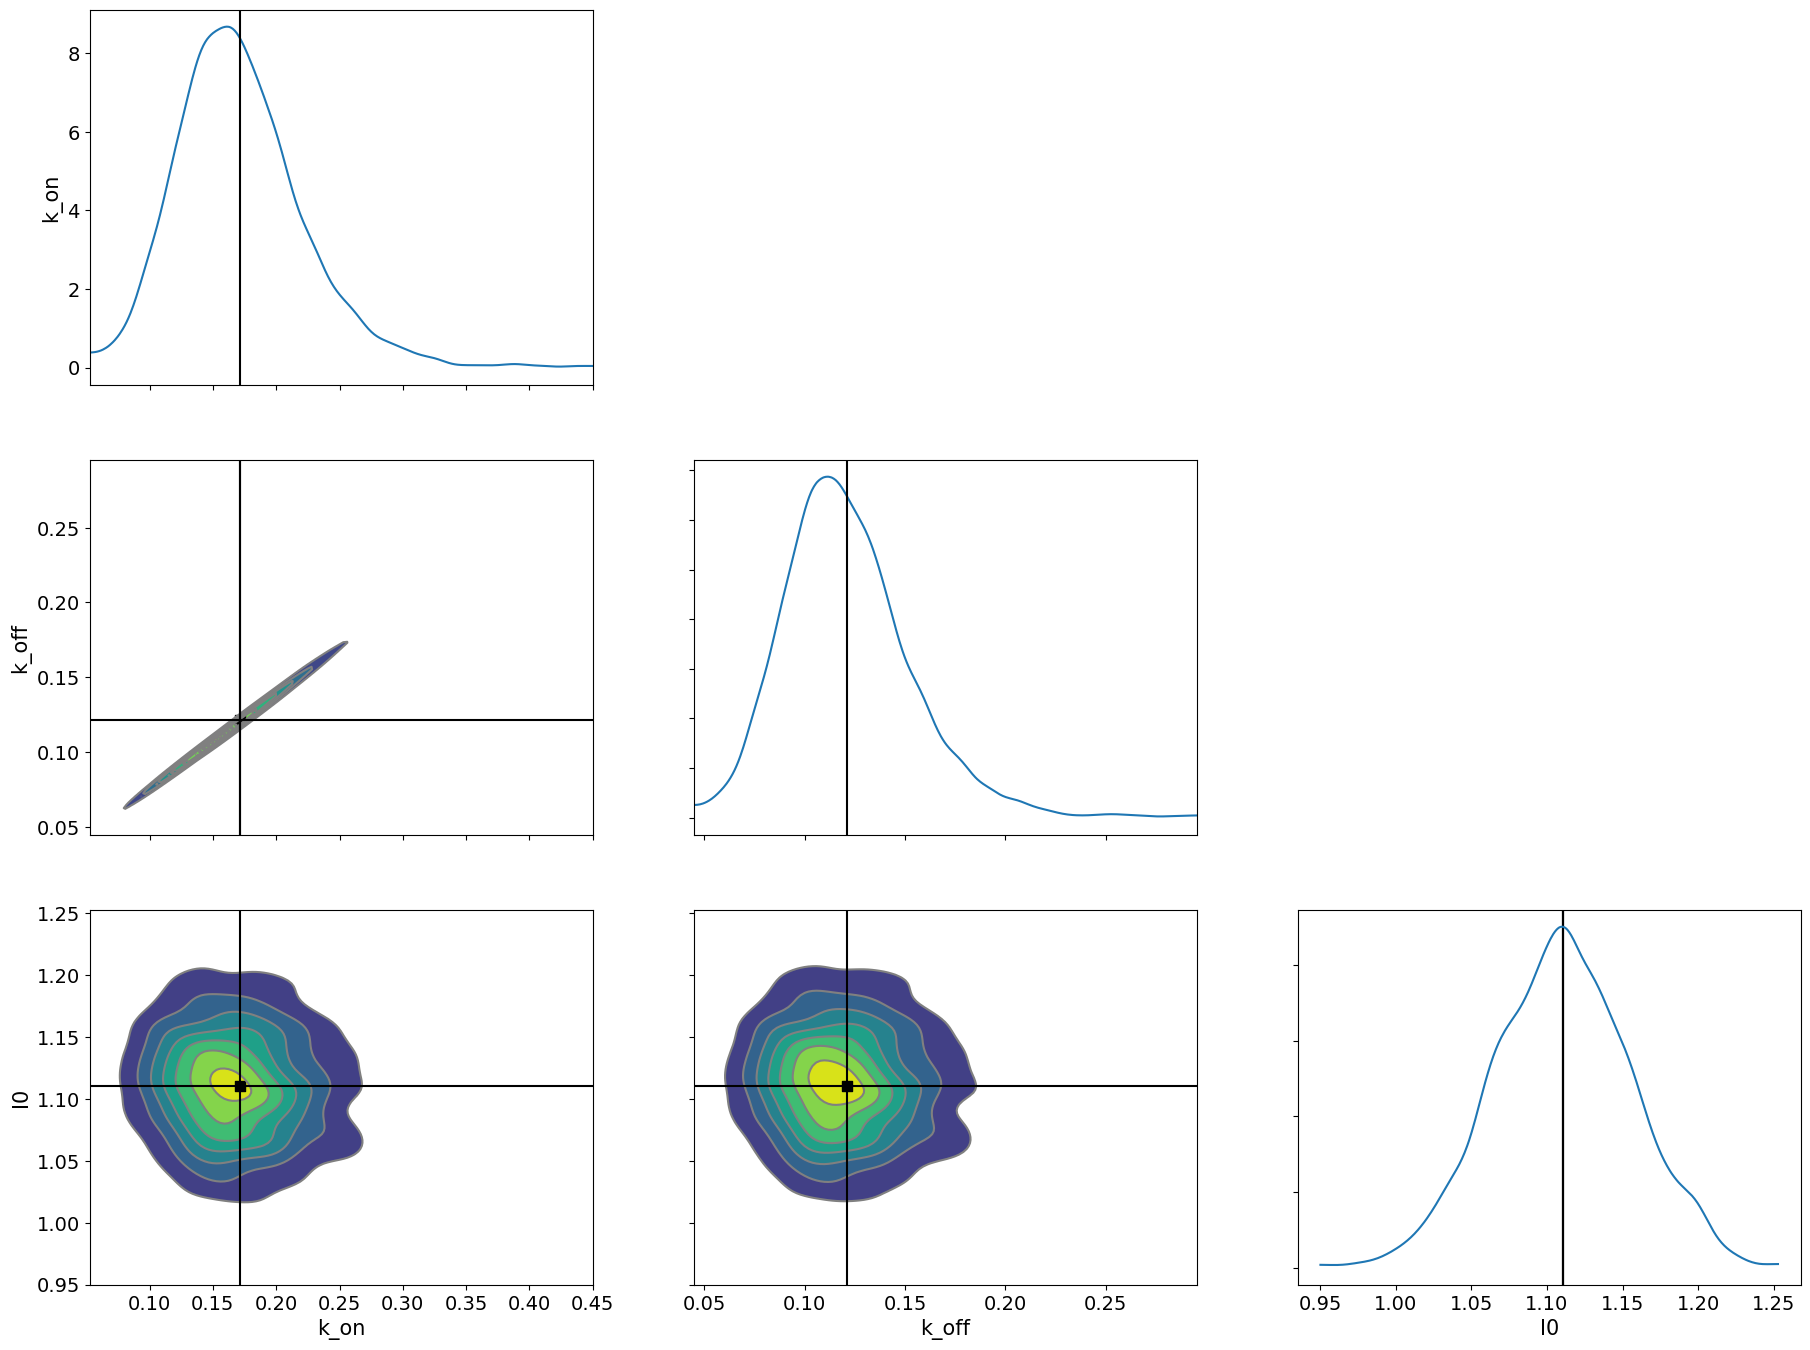

In [39]:
az.plot_pair(trace_cell_nmy ,
             var_names = ['k_on', 'k_off','I0'],
             kind='kde',
             marginals = True,
             point_estimate="mean",
            )

[1.11028524 1.09417272 1.09154202 1.10036901 1.08709322 1.08862116
 1.0816701  1.07598982 1.07695895 1.07999371 1.06500485 1.05920075
 1.04736128 1.02786446 1.02555227 1.0422717  1.04090587 1.0334186
 1.01596378 1.000498   0.99642803 0.99539205 0.99115331 0.98476645
 0.98309172 0.96749992 0.9500828  0.93137764 0.91417053 0.89577239
 0.88979159 0.87856197 0.86766774 0.85252002 0.83531201 0.81279898
 0.79021472 0.76688795 0.74125103 0.71687623 0.69281614 0.66762994
 0.64232768 0.62009407 0.59630969]
0.17121778145724467
0.12116066092986355


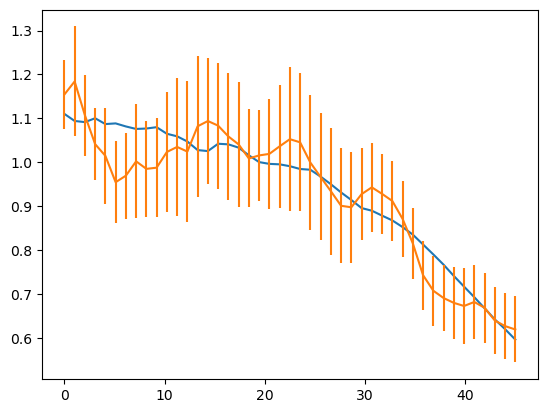

In [40]:
## Itheory NMY-2 

# prior_result + DT*(k1*c-k2*prior_result)


trace_cell_nmy.unstack(inplace = "True")
I_theory_apop_nmy = list

a = az.extract(trace_cell_nmy, group = 'posterior', var_names = ["k_on"], keep_dataset = 'true')
k_on_array = a.k_on.values
a = az.extract(trace_cell_nmy, group = 'posterior', var_names = ["k_off"], keep_dataset = 'true')
k_off_array = a.k_off.values 
a = az.extract(trace_cell_nmy, group = 'posterior', var_names = ["I0"], keep_dataset = 'true')
I0_ani_apop = a.I0.values 

m_I0 = stat.mean(I0_ani_apop)
m_koff = stat.mean(k_off_array)
m_kon = stat.mean(k_on_array)
my_time = len(ani_cell)
dt = 1
count = 1
I_ani_apop = np.zeros(my_time)
I_ani_apop[0] = m_I0
while (count <=my_time-1 ):

    I_ani_apop[count] = I_ani_apop[count-1] + dt*(m_kon*circumference_cell[count-1] - m_koff*I_ani_apop[count-1])
    count = count + 1 
    
t = np.linspace(0,my_time,my_time)
plt.plot(t,I_ani_apop)
plt.errorbar(t,nmy_cell,nmy_cell_SE)

# Get I1 
a = az.extract(trace_cell_nmy, group = 'posterior', var_names = ["I1"], keep_dataset = 'true')
I1_apop_nmy = a.I1.values
print(I_ani_apop)
print(m_kon)
print(m_koff)

## ANI Cellularization

In [41]:
constrained_prior_kon = pm.find_constrained_prior(pm.Gamma,lower= 0.01, upper = 1, mass = .95, init_guess = dict(alpha=1,beta=1))

constrained_prior_koff = pm.find_constrained_prior(pm.Gamma,lower= 0.01, upper = 1, mass = .95, init_guess = dict(alpha=1,beta=1))

C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(
C:\Users\jackl\anaconda4\lib\site-packages\pytensor\tensor\rewriting\elemwise.py:694: UserWarning: Rewrite warning: The Op gammainc_der does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
  warn(


In [42]:

    with pm.Model() as cell:
    
        # Put in priors (parameter ranges)
        kon = pm.Gamma("k_on", **constrained_prior_kon)
        koff = pm.Gamma("k_off", **constrained_prior_koff)
        I0 = pm.Normal("I0", mu= ani_cell[0], sigma = ani_cell_SE[0])
    
        # Model for the expected intensity
        i, _ = pt.scan(lambda c, prior_result, k1, k2: prior_result + DT*(k1*c-k2*prior_result),
                   sequences = [circumference_cell],        
                   non_sequences = [kon, koff],
                   outputs_info = I0)
    
        m = pm.Deterministic("mu_theory", i)
        I1 = pm.Deterministic("I1", i[0])     #(This is just for book-keeping)

    
        # compare to measured intensity, taking error from data
        
        I = pm.Normal("Inten", mu=m, sigma= ani_cell_SE, observed= ani_cell)
      # generate a few samples from prior for sanity check
        prior = pm.sample_prior_predictive(10)
    
        # run MCMC sampler
        trace = pm.sample(tune=2000, draws=2000)
    
        trace_cell_ani = trace 

Sampling: [I0, Inten, k_off, k_on]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [k_on, k_off, I0]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 84 seconds.


In [ ]:
# Calculate Itheory 

I_theory = array() 



array([[<AxesSubplot:>, None],
       [<AxesSubplot:xlabel='k_on', ylabel='k_off'>, <AxesSubplot:>]],
      dtype=object)

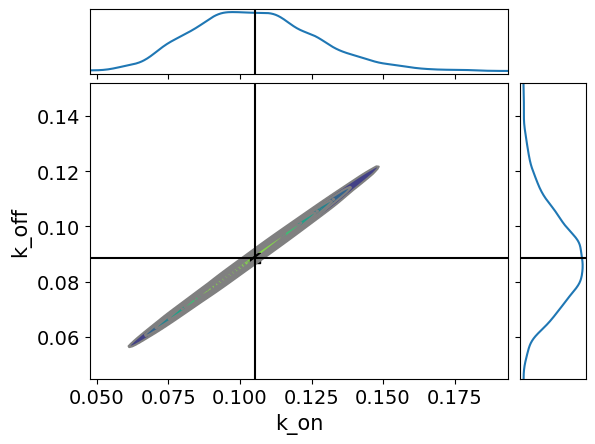

In [43]:
az.plot_pair(trace_cell_ani ,
             var_names = ['k_on', 'k_off'],
             kind='kde',
             marginals = True,
             point_estimate="mean",
            )

array([[<AxesSubplot:title={'center':'k_on'}>,
        <AxesSubplot:title={'center':'k_on'}>],
       [<AxesSubplot:title={'center':'k_off'}>,
        <AxesSubplot:title={'center':'k_off'}>],
       [<AxesSubplot:title={'center':'I0'}>,
        <AxesSubplot:title={'center':'I0'}>]], dtype=object)

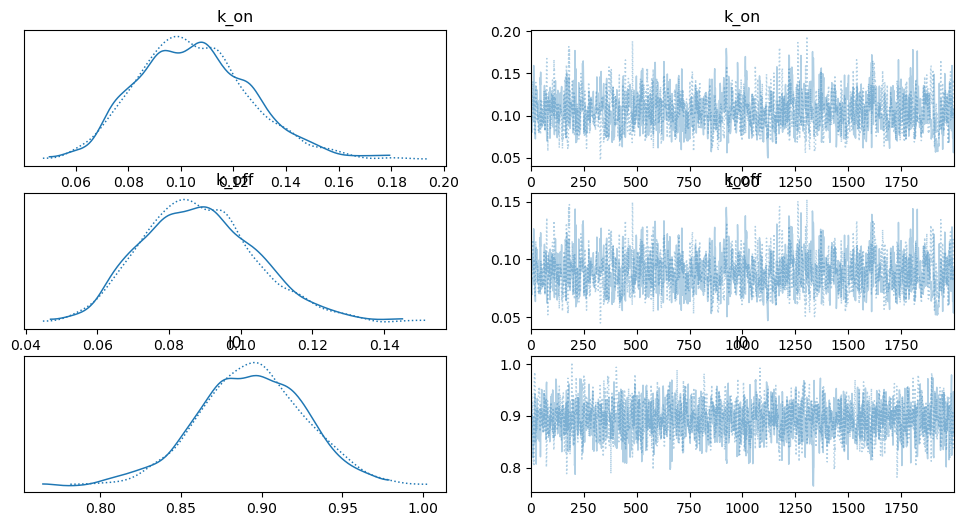

In [44]:
pm.plot_trace(trace_cell_ani,
              var_names = ['k_on', 'k_off','I0'],)

array([[<AxesSubplot:ylabel='k_on'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:ylabel='k_off'>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:xlabel='k_on', ylabel='I0'>,
        <AxesSubplot:xlabel='k_off'>, <AxesSubplot:xlabel='I0'>]],
      dtype=object)

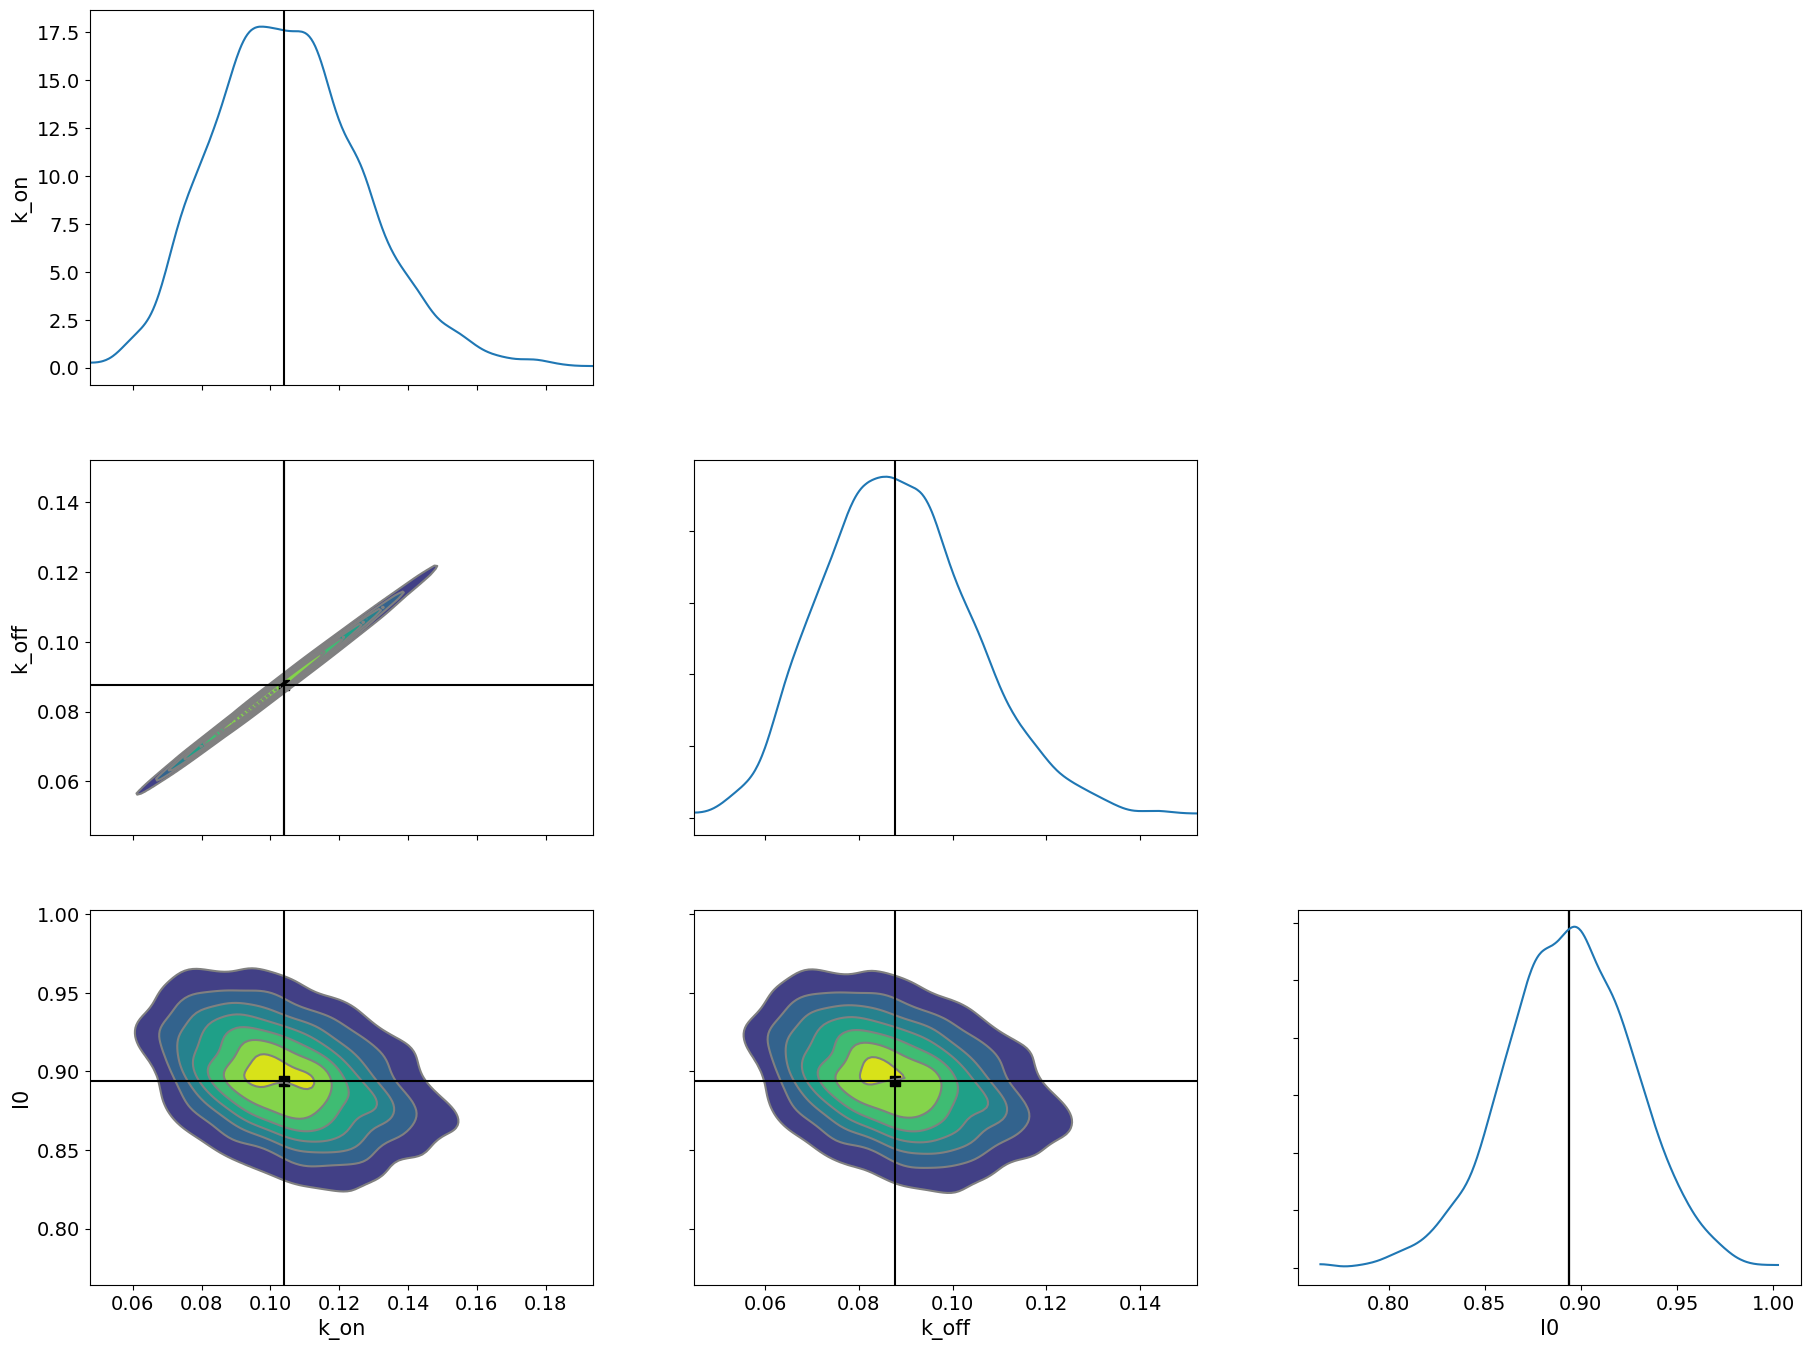

In [45]:
az.plot_pair(trace_cell_ani ,
             var_names = ['k_on', 'k_off','I0'],
             kind='kde',
             marginals = True,
             point_estimate="median",
            )

[0.89347319 0.88705409 0.88829474 0.89627558 0.8906136  0.89356855
 0.89116088 0.8892303  0.89113694 0.89421702 0.88616591 0.88336043
 0.87665966 0.86496188 0.86341698 0.87354085 0.8728906  0.8684317
 0.85768053 0.84780547 0.844662   0.8433599  0.84012646 0.8355429
 0.8337878  0.82350487 0.8118496  0.7991381  0.78708148 0.77407952
 0.76849619 0.75973448 0.75111935 0.7398407  0.72716662 0.71107188
 0.69468326 0.67760867 0.65888957 0.64069654 0.62249432 0.60342112
 0.58409142 0.56647786 0.54781604]
0.10529528239239261
0.08868643874184841


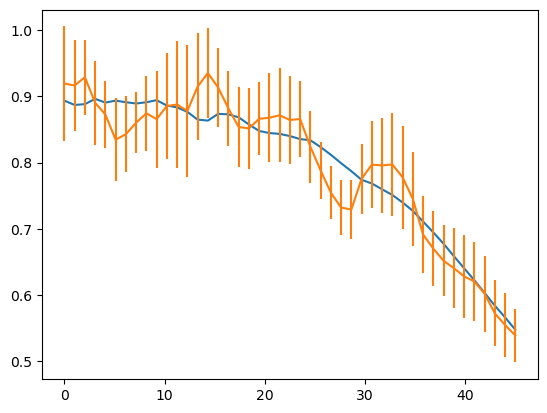

In [47]:
## Itheory NMY-2 

# prior_result + DT*(k1*c-k2*prior_result)


trace_cell_ani.unstack(inplace = "True")
I_theory_apop_nmy = list

a = az.extract(trace_cell_ani, group = 'posterior', var_names = ["k_on"], keep_dataset = 'true')
k_on_array = a.k_on.values
a = az.extract(trace_cell_ani, group = 'posterior', var_names = ["k_off"], keep_dataset = 'true')
k_off_array = a.k_off.values 
a = az.extract(trace_cell_ani, group = 'posterior', var_names = ["I0"], keep_dataset = 'true')
I0_ani_apop = a.I0.values 

m_I0 = stat.mean(I0_ani_apop)
m_koff = stat.mean(k_off_array)
m_kon = stat.mean(k_on_array)

my_time = len(ani_cell)
dt = 1
count = 1
I_ani_apop = np.zeros(my_time)
I_ani_apop[0] = m_I0
while (count <=my_time-1 ):

    I_ani_apop[count] = I_ani_apop[count-1] + dt*(m_kon*circumference_cell[count-1] - m_koff*I_ani_apop[count-1])
    count = count + 1 
    
t = np.linspace(0,my_time,my_time)
plt.plot(t,I_ani_apop)
plt.errorbar(t,ani_cell,ani_cell_SE)

# Get I1 
a = az.extract(trace_cell_ani, group = 'posterior', var_names = ["I1"], keep_dataset = 'true')
I1_apop_nmy = a.I1.values
print(I_ani_apop)
print(m_kon)
print(m_koff)

array([[<AxesSubplot:title={'center':'k_on'}>,
        <AxesSubplot:title={'center':'k_on'}>],
       [<AxesSubplot:title={'center':'k_off'}>,
        <AxesSubplot:title={'center':'k_off'}>]], dtype=object)

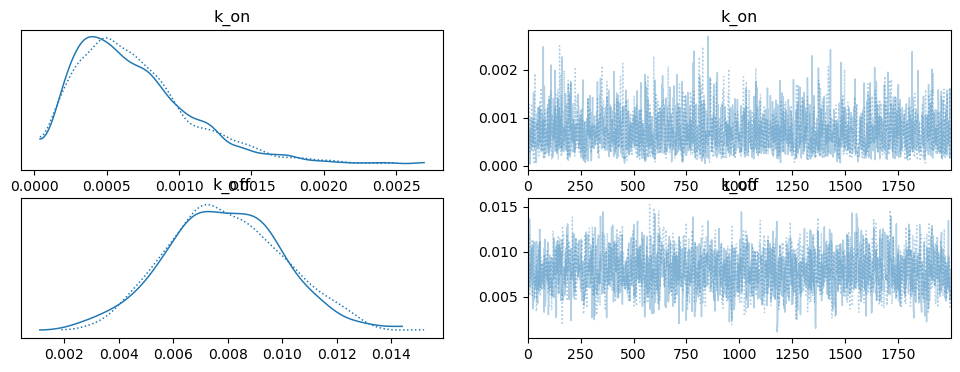

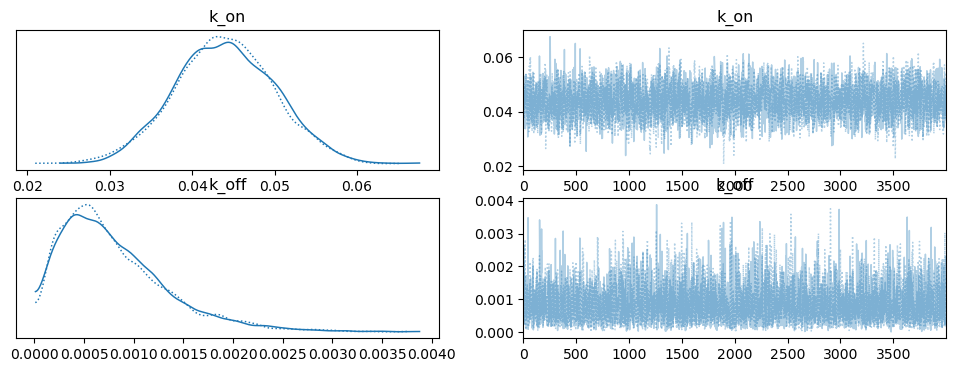

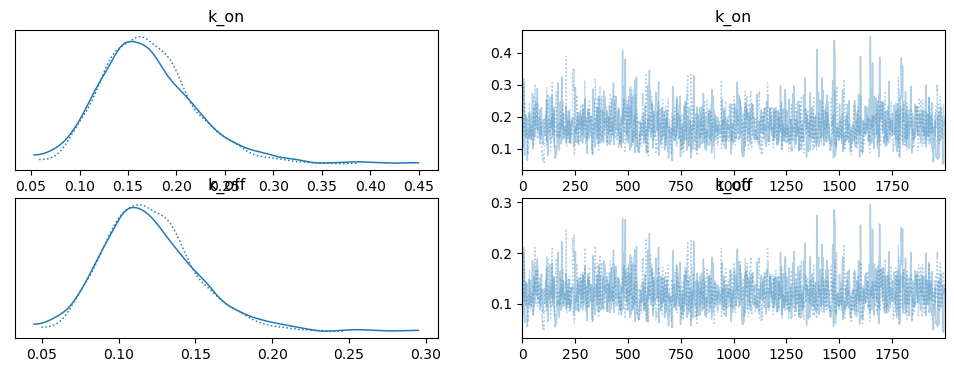

In [48]:
quantile_apop_nmy = trace_apop_nmy.posterior[['k_on', 'k_off']].quantile((.1, .9), dim=("chain", "draw"))
#lines = list(xarray_var_iter(quantile_ds, skip_dims={"quantile"}))

pm.plot_trace(trace_apop_nmy,
              var_names = ['k_on', 'k_off'],)

quantile_gsc_nmy = trace_gsc_nmy.posterior[['k_on', 'k_off']].quantile((.1, .9), dim=("chain", "draw"))

pm.plot_trace(trace_gsc_nmy, var_names = ['k_on', 'k_off'],)

quantile_cell_nmy = trace_cell_nmy.posterior[['k_on', 'k_off']].quantile((.1, .9), dim=("chain", "draw"))

pm.plot_trace(trace_cell_nmy, var_names = ['k_on', 'k_off'],)

In [242]:
quantile_apop_ani = trace_apop_ani.posterior[['k_on', 'k_off']].quantile((.1, .9), dim=("chain", "draw"))
#lines = list(xarray_var_iter(quantile_ds, skip_dims={"quantile"}))
quantile_apop_ani

quantile_gsc_ani = trace_gsc_ani.posterior[['k_on', 'k_off']].quantile((.1, .9), dim=("chain", "draw"))

#quantile_gsc_ani

quantile_cell_ani = trace_cell_ani.posterior[['k_on', 'k_off']].quantile((.1, .9), dim=("chain", "draw"))

#quantile_cell_ani


In [246]:
quantile_apop_nmy = trace_apop_nmy.posterior[['k_on', 'k_off']].quantile((.1, .9), dim=("chain", "draw"))
#lines = list(xarray_var_iter(quantile_ds, skip_dims={"quantile"}))
quantile_apop_ani

quantile_gsc_nmy = trace_gsc_nmy.posterior[['k_on', 'k_off']].quantile((.1, .9), dim=("chain", "draw"))

#quantile_gsc_ani

quantile_cell_nmy = trace_cell_nmy.posterior[['k_on', 'k_off']].quantile((.1, .9), dim=("chain", "draw"))

#quantile_cell_ani

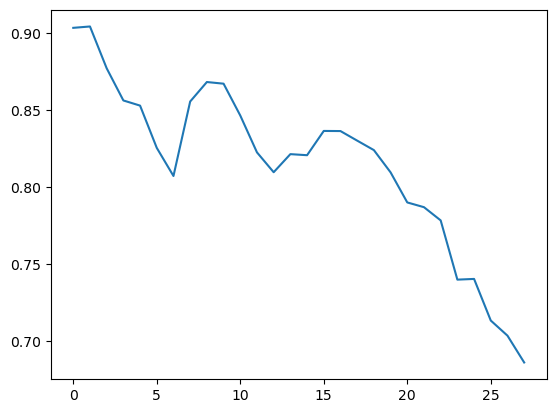

In [256]:
plt.plot(trace_apop_nmy.observed_data['Inten'])